In [152]:
from functions import utils_plot
from functions import utils_get
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read MOER data

In [153]:
df_moer = pd.read_csv("./moer/moer_15.csv")
df_moer.head()

,datetime,value,moer
0,2023-01-01 00:00:00+00:00,997.000000,452.638000
1,2023-01-01 00:15:00+00:00,995.000000,451.730000
2,2023-01-01 00:30:00+00:00,995.333333,451.881333
3,2023-01-01 00:45:00+00:00,995.333333,451.881333
4,2023-01-01 01:00:00+00:00,987.000000,448.098000


In [154]:
df_moer['datetime'] = pd.to_datetime(df_moer['datetime'])
df_moer['datetime'] = df_moer['datetime'].dt.tz_convert('America/Los_Angeles')

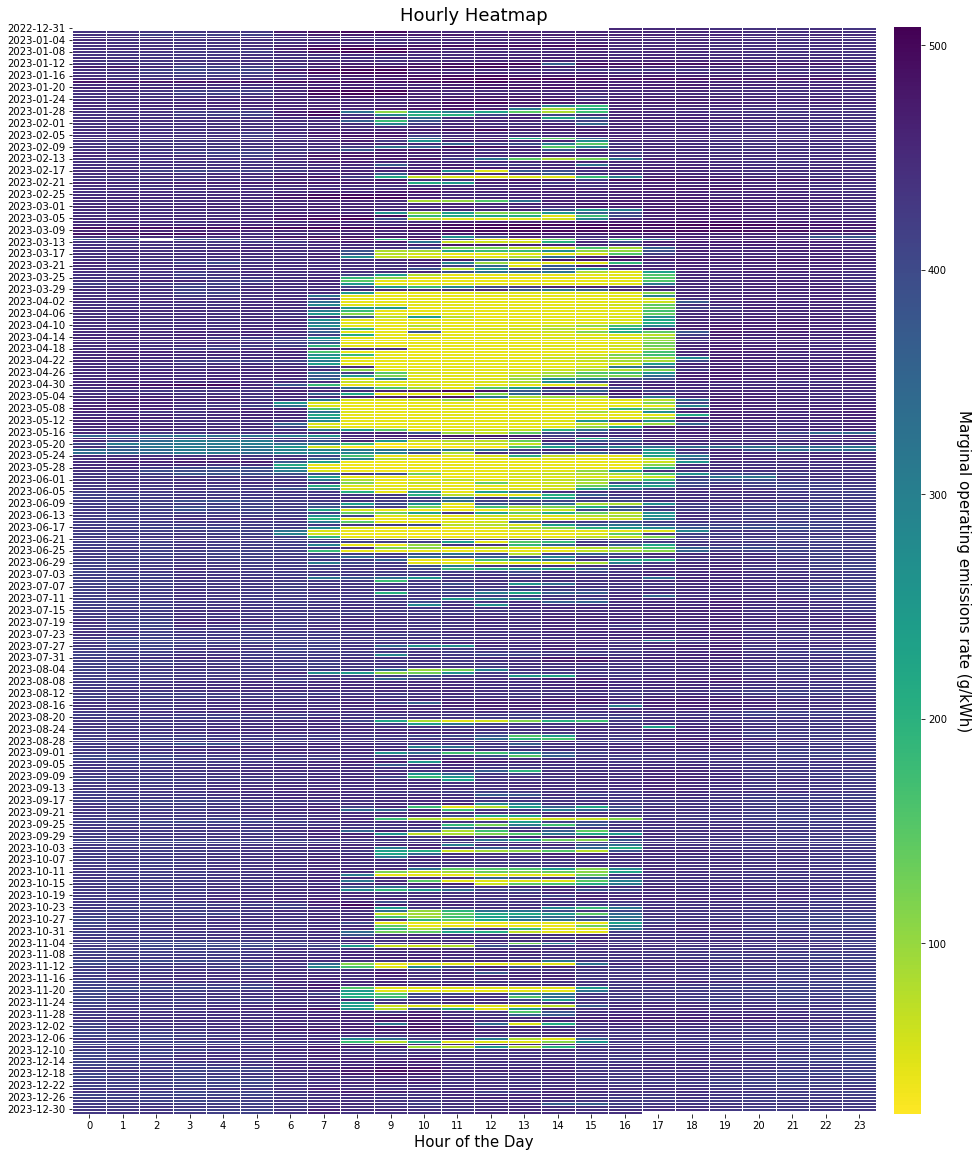

In [155]:
utils_plot.plot_hourly_heatmap(df_moer, ['moer'], "Marginal operating emissions rate (g/kWh)", figsize=(18, 20))

Read power data

In [156]:
data_df = pd.read_csv("./sw/sw.csv")
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df['datetime'] = data_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_power = utils_get.get_power(df=data_df, unit="W")
df_power.head()

/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,datetime,SDH.SW.MSA.CD4RA.PWR REAL 3 P,SDH.SW.MSA.ATS-ES.PWR REAL 3 P,SDH.SW.MSA.MSB.TIE.PWR REAL 3P,SDH.SW.MSA.MS41A.PWR REAL 3 P,SDH.SW.MSA.MDC.PWR REAL 3 P,SDH.SW.MSA.ATS-E2.PWR REAL 3 P,SDH.SW.MSB.MS41B.PWR REAL 3 P,SDH.SW.MSA.MAIN.PWR REAL 3 P,SDH.SW.MSA.MSB.PWR REAL 3 P,SDH.SW.MSB.ATS-EL.PWR REAL 3 P,SDH.SW.MSA.ATS-E1.PWR REAL 3 P,SDH.SW.MSB.CB4A.PWR REAL 3 P,SDH.SW.MSA.CH-2.PWR REAL 3 P,SDH.SW.MSA.MS41B.PWR REAL 3 P,SDH.SW.MSA.CD41A.PWR REAL 3 P,SDH.SW.MSB.MS41A.PWR REAL 3 P,SDH.SW.MSB.MAIN.PWR REAL 3 P
0,2023-01-20 15:45:00-08:00,24.999,16.999,0.0,331.999,22.999,30.999,179.999,537.999,0.0,93.999,59.999,55.999,71.999,0.0,29.999,0.0,379.999
1,2023-01-20 16:00:00-08:00,26.999,17.999,0.0,330.999,23.999,30.999,177.999,539.999,0.0,95.999,58.999,55.999,73.999,0.0,32.999,0.0,367.999
2,2023-01-20 16:15:00-08:00,24.999,17.499,0.0,334.499,24.499,27.999,175.499,546.999,0.0,102.999,69.999,57.999,70.999,0.0,25.999,0.0,363.499
3,2023-01-20 16:30:00-08:00,23.999,16.999,0.0,319.999,23.999,24.999,186.999,535.999,0.0,94.999,59.999,55.999,73.999,0.0,27.999,0.0,368.999
4,2023-01-20 16:45:00-08:00,23.999,17.999,0.0,325.999,23.499,30.999,160.999,542.499,0.0,99.999,60.999,54.999,68.999,0.0,29.999,0.0,366.499


Read climate data

In [353]:
df_climate = pd.read_csv("./climate/climate.csv")
df_climate['datetime'] = pd.to_datetime(df_climate['datetime'])
df_climate['datetime'] = df_climate['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df_climate.head()

,datetime,air_temp,dni,ghi,t_out,rh_out,dew_point,wind_s,lat,long,time_zone
0,2023-01-01 00:00:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
1,2023-01-01 00:15:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
2,2023-01-01 00:30:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
3,2023-01-01 00:45:00-08:00,10.0,0.0,0.0,10.3,87.562180,8.3,1.8,37.978,-122.0311,America/Los_Angeles
4,2023-01-01 01:00:00-08:00,10.0,0.0,0.0,9.4,86.289932,7.2,1.5,37.978,-122.0311,America/Los_Angeles


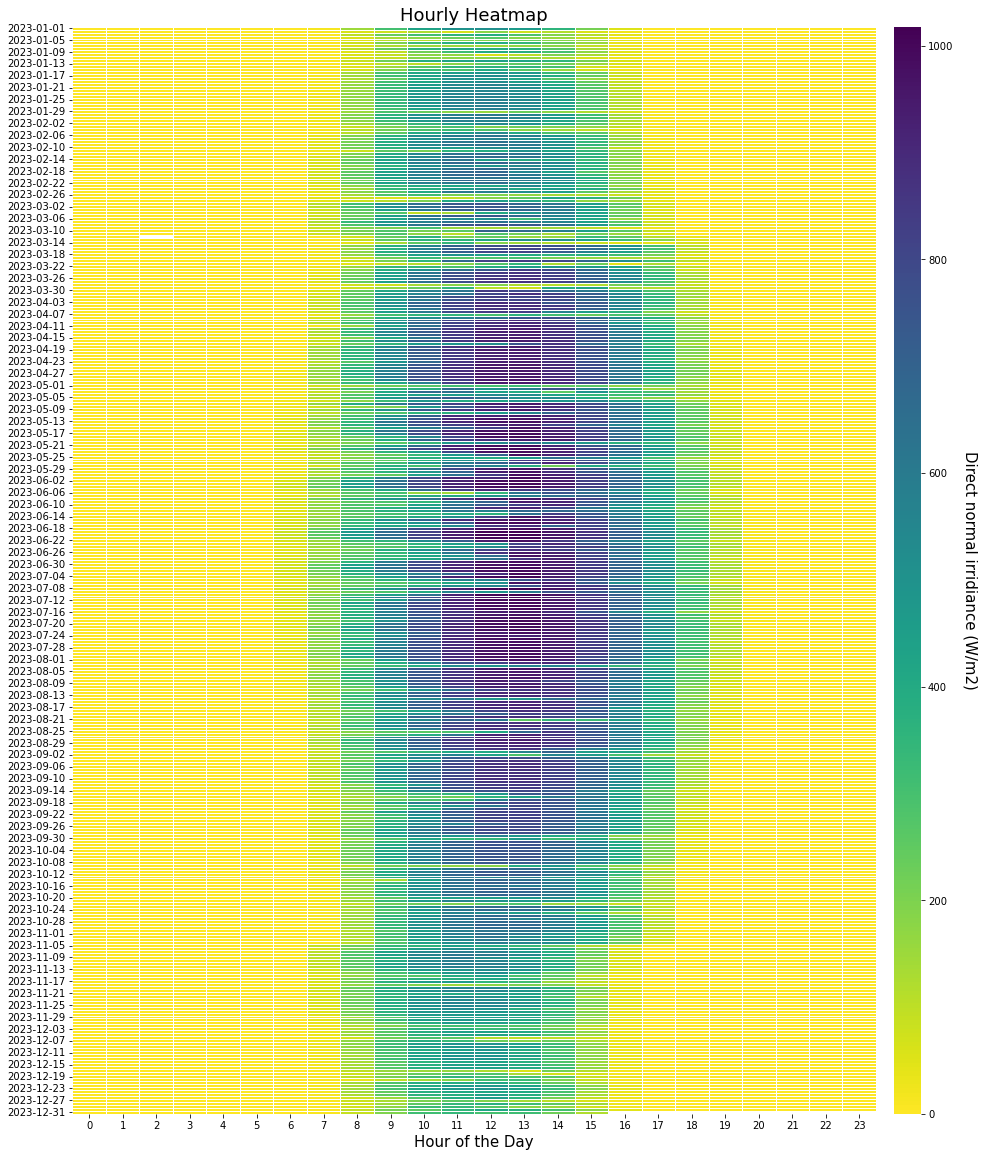

In [158]:
utils_plot.plot_hourly_heatmap(df_climate, ['ghi'], "Direct normal irridiance (W/m2)", figsize=(18, 20))

Grid demand and supply information from California ISO

In [159]:
grid_demand = utils_get.get_grid_demand('./grid/demand/*.csv')
grid_solar = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Solar')
grid_wind = utils_get.get_grid_renew('./grid/renewables/*.csv', 'Wind')
grid_renew = pd.merge(grid_solar, grid_wind, on='datetime', how='outer')
grid_renew['renew'] = grid_renew['Solar'] + grid_renew['Wind']
df_grid = pd.merge(grid_renew, grid_demand, on='datetime', how='outer')
df_grid.head()

,datetime,Solar,Wind,renew,demand
0,2023-02-01 00:00:00-08:00,-4.54523,284.48324,279.93801,23146.0
1,2023-02-01 00:00:00-08:00,-4.54523,17.65355,13.10832,23146.0
2,2023-02-01 00:00:00-08:00,0.40150,284.48324,284.88474,23146.0
3,2023-02-01 00:00:00-08:00,0.40150,17.65355,18.05505,23146.0
4,2023-02-01 00:00:00-08:00,-5.65649,284.48324,278.82675,23146.0


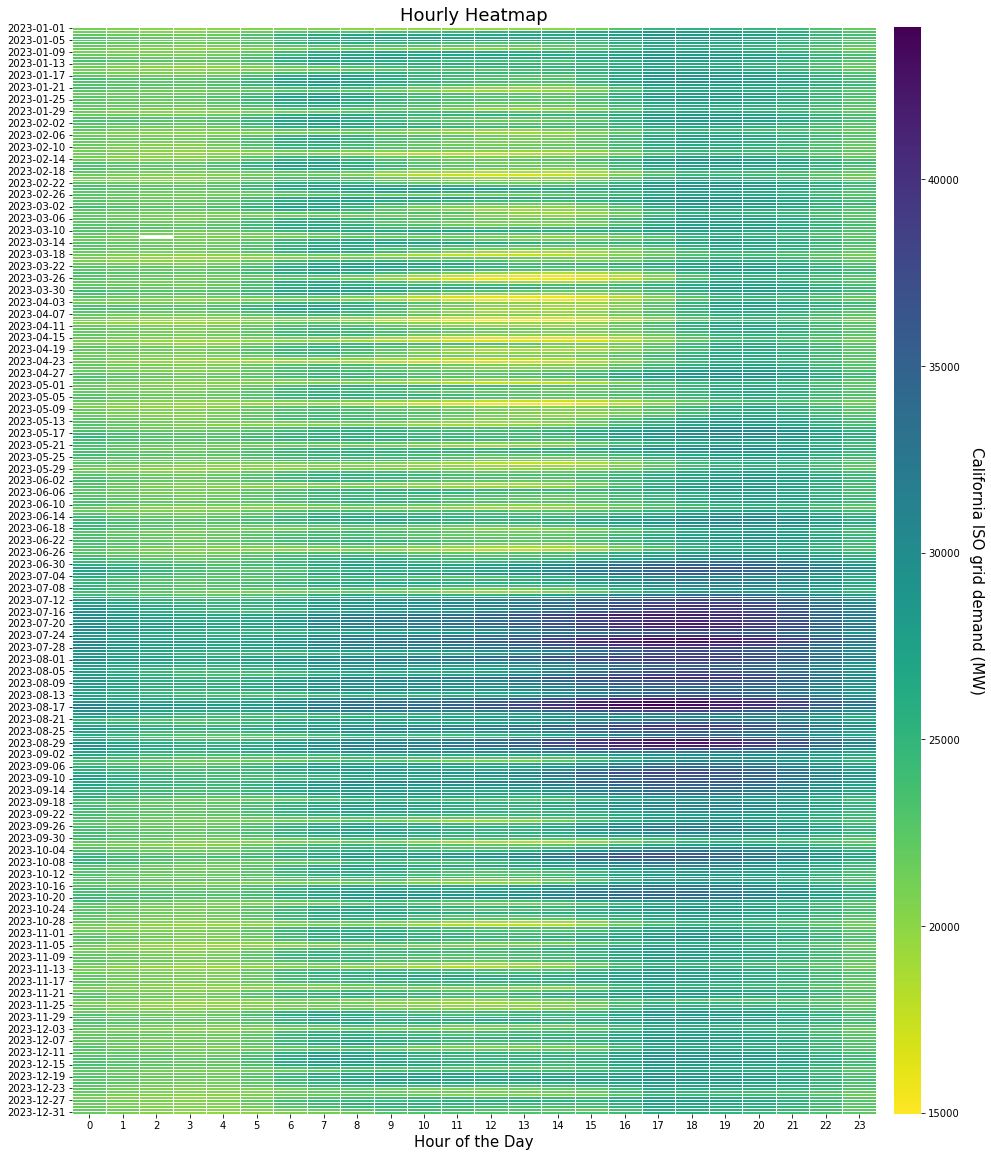

In [160]:
utils_plot.plot_hourly_heatmap(df_grid, ['demand'], 'California ISO grid demand (MW)', figsize=(18, 20))

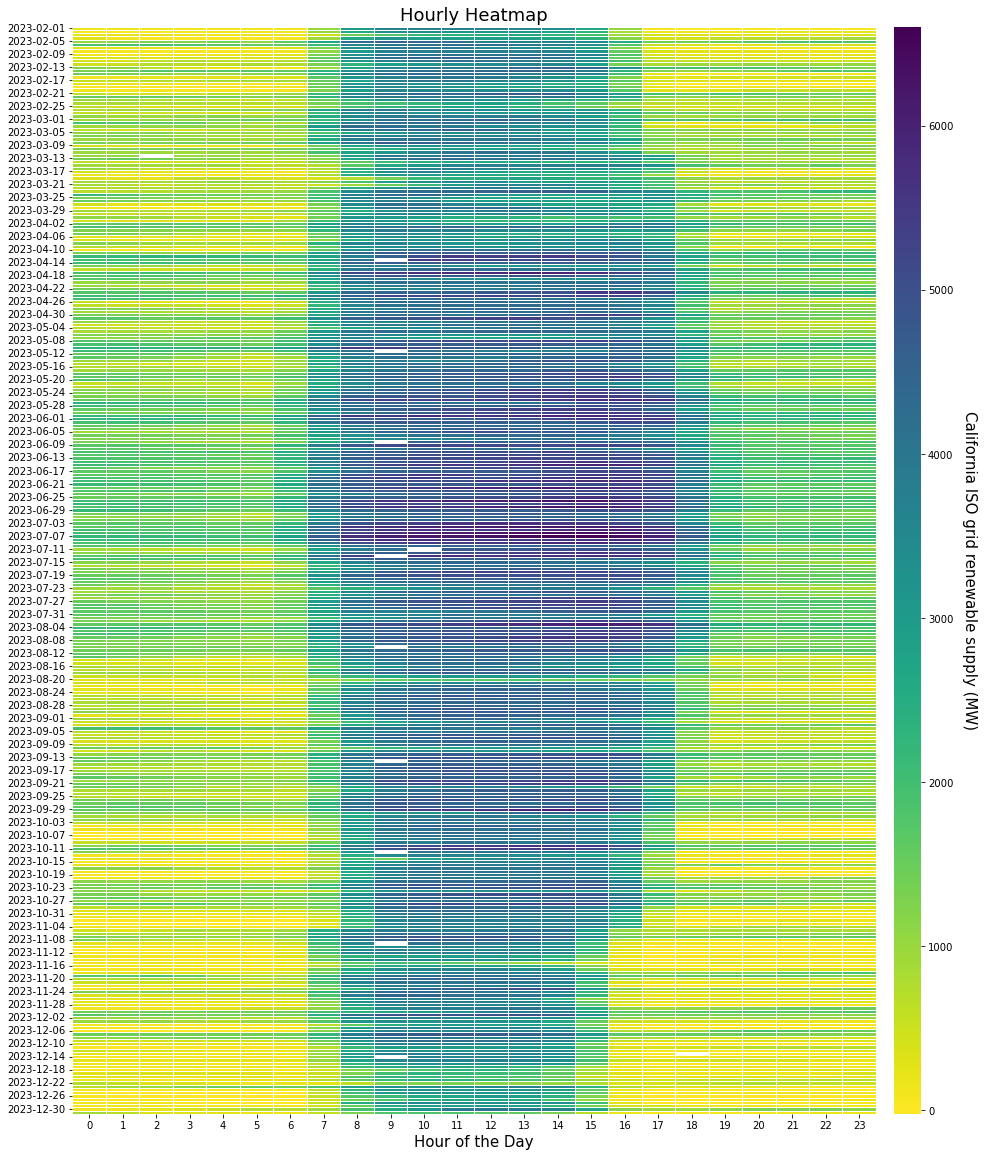

In [161]:
utils_plot.plot_hourly_heatmap(df_grid, ['renew'], 'California ISO grid renewable supply (MW)', figsize=(18, 20))

## Task 1: Examing HVAC carbon emissions at Main station level

In [162]:
hvac = df_power['SDH.SW.MSA.MAIN.PWR REAL 3 P'] - df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,385.999
1,2023-01-20 16:00:00-08:00,386.999
2,2023-01-20 16:15:00-08:00,387.999
3,2023-01-20 16:30:00-08:00,402.999
4,2023-01-20 16:45:00-08:00,377.499


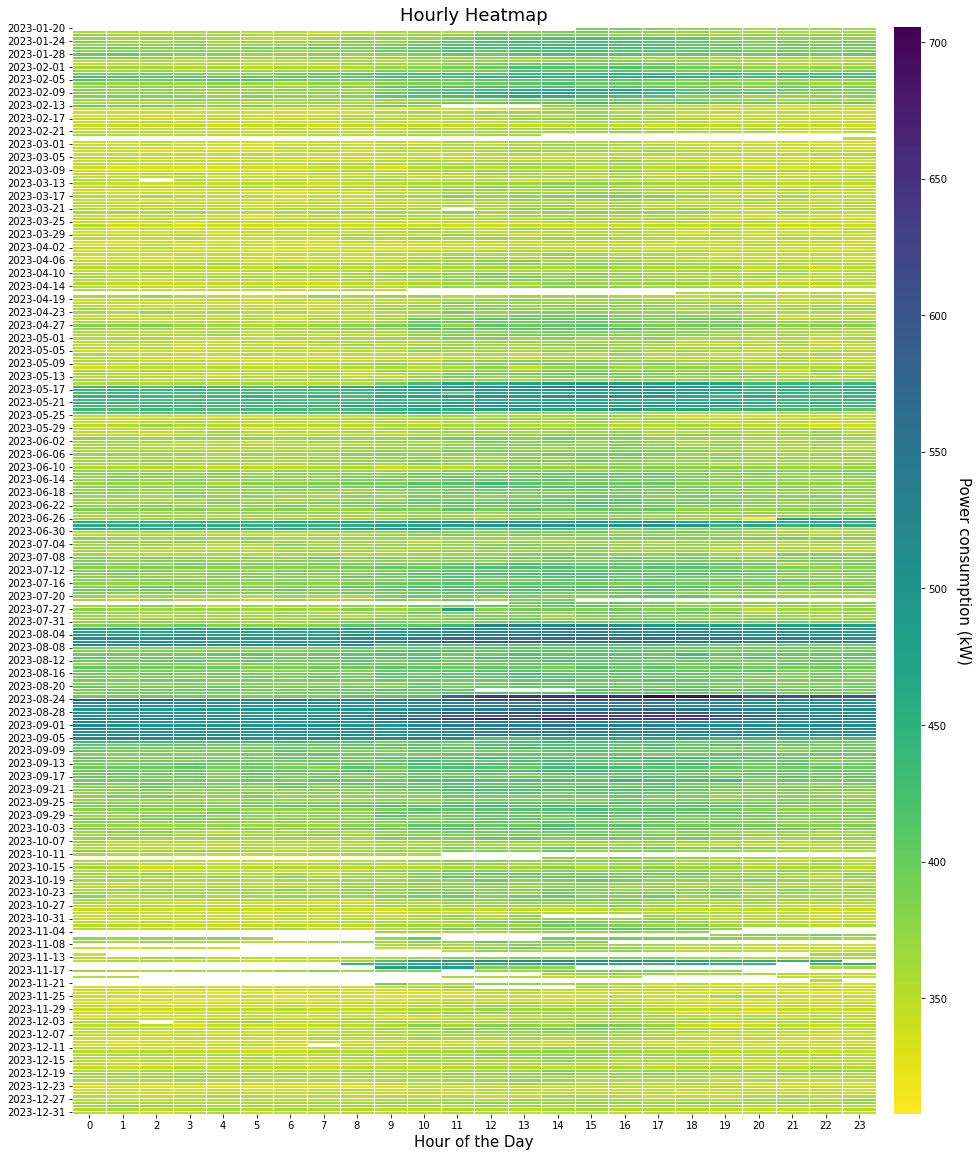

In [163]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

Get emissions data

In [164]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,182.954262
1,2023-01-20 16:00:00-08:00,177.044561
2,2023-01-20 16:15:00-08:00,176.210263
3,2023-01-20 16:30:00-08:00,182.595623
4,2023-01-20 16:45:00-08:00,171.098905


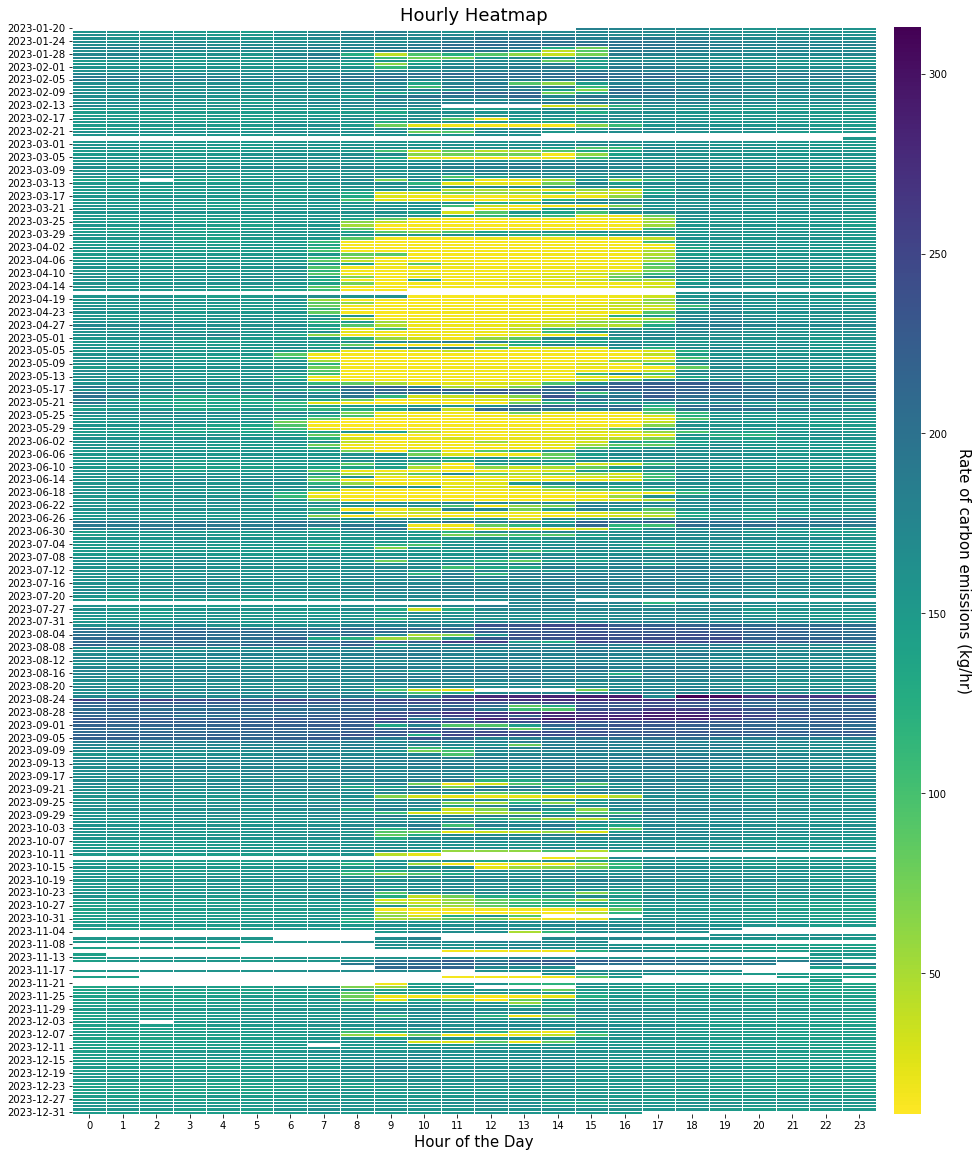

In [165]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [166]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_all.head()

,datetime,HVAC,air_temp,dni,ghi,t_out,rh_out,wind_s,lat,long,time_zone
0,2023-01-20 15:45:00-08:00,182.954262,13.0,680.0,207.0,13.2,NaN,1.5,37.871666,-122.272781,America/Los_Angeles
1,2023-01-20 16:00:00-08:00,177.044561,13.0,622.0,164.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
2,2023-01-20 16:15:00-08:00,176.210263,12.0,545.0,121.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
3,2023-01-20 16:30:00-08:00,182.595623,12.0,445.0,79.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles
4,2023-01-20 16:45:00-08:00,171.098905,12.0,225.0,40.0,12.8,NaN,3.1,37.871666,-122.272781,America/Los_Angeles


Hourly average scatter plot

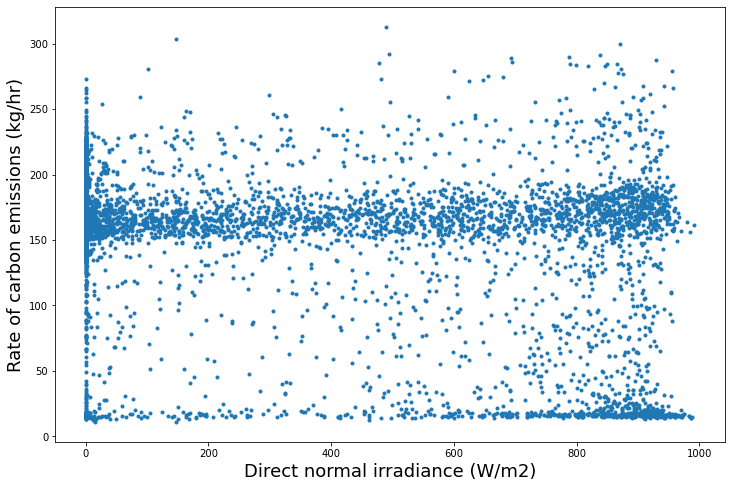

In [167]:
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
plt.figure(figsize=[12, 8])
plt.plot(df_hourly['dni'], df_hourly['HVAC'], '.')
plt.xlabel('Direct normal irradiance (W/m2)', fontsize = 18)
plt.ylabel('Rate of carbon emissions (kg/hr)', fontsize = 18)
plt.show()

Occupied hours

In [168]:
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]

Time window: Mar - Jun

In [169]:
df_MJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


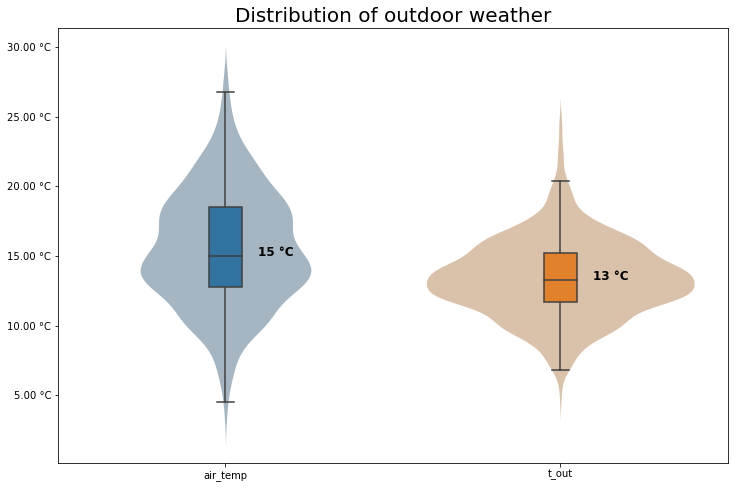

In [170]:
utils_plot.create_violin_plot(df_MJ, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


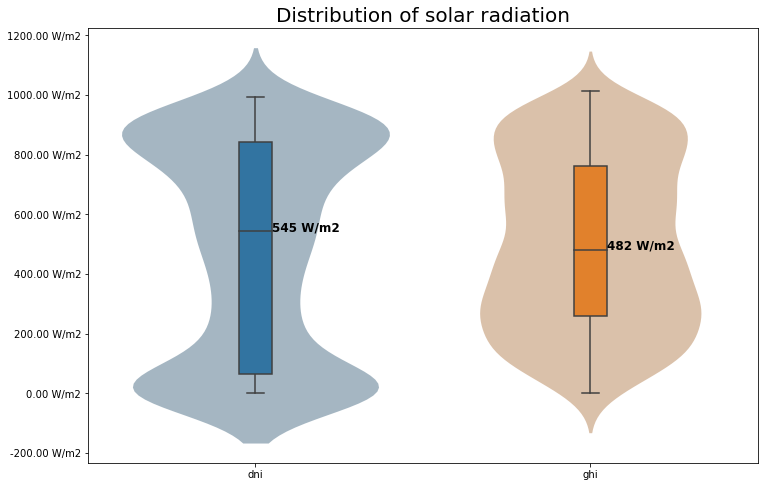

In [171]:
utils_plot.create_violin_plot(df_MJ, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation', figsize=(12, 8))

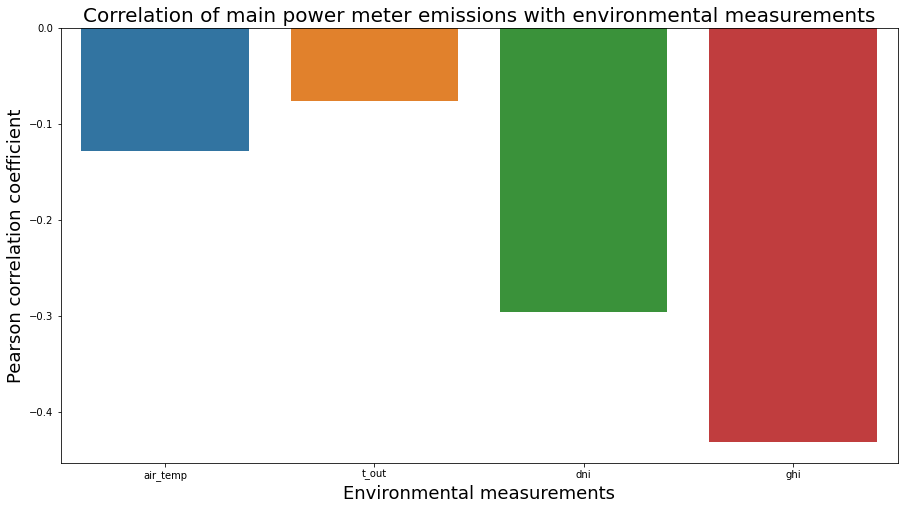

In [172]:
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Jul - Sep

In [173]:
df_JS = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


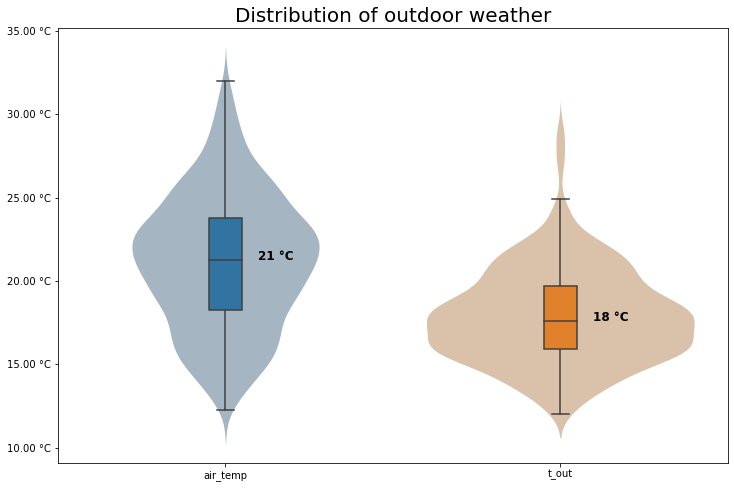

In [174]:
utils_plot.create_violin_plot(df_JS, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


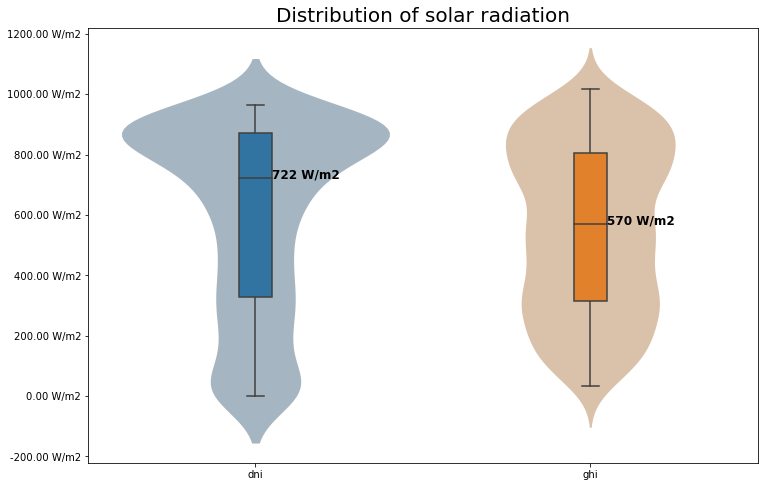

In [175]:
utils_plot.create_violin_plot(df_JS, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation', figsize=(12, 8))

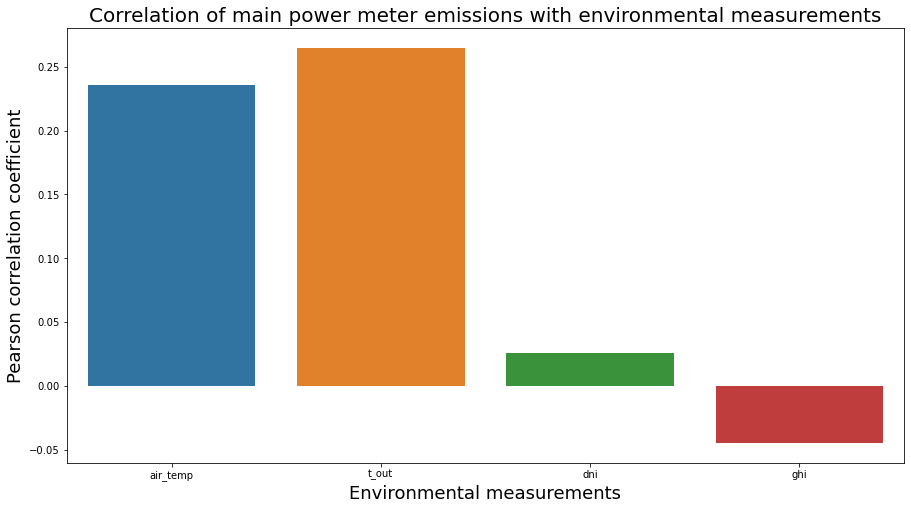

In [176]:
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Time window: Oct - Feb

In [177]:
df_OF = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 't_out', 'dni', 'ghi']]

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


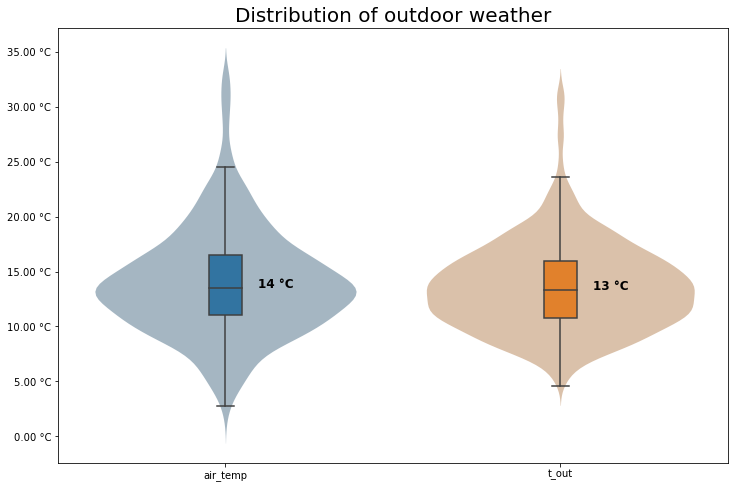

In [178]:
utils_plot.create_violin_plot(df_OF, ['air_temp', 't_out'], ' °C', 'Distribution of outdoor weather', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


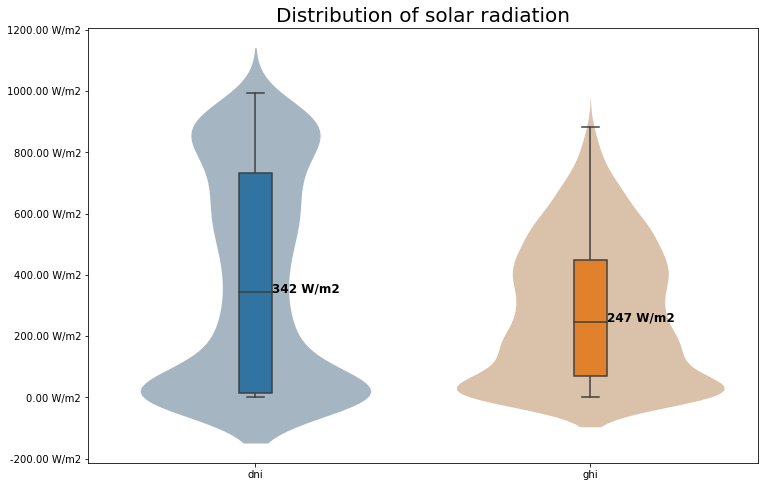

In [179]:
utils_plot.create_violin_plot(df_OF, ['dni', 'ghi'], ' W/m2', 'Distribution of solar radiation', figsize = (12, 8))

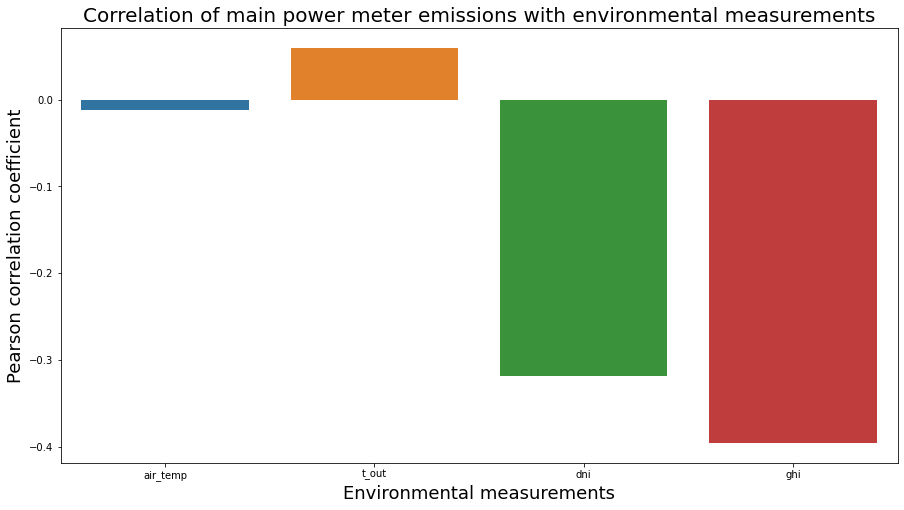

In [180]:
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

Load shift analysis

Time window: August ~ September

In [181]:
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 7) & (df_hourly['datetime'].dt.month <= 9)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


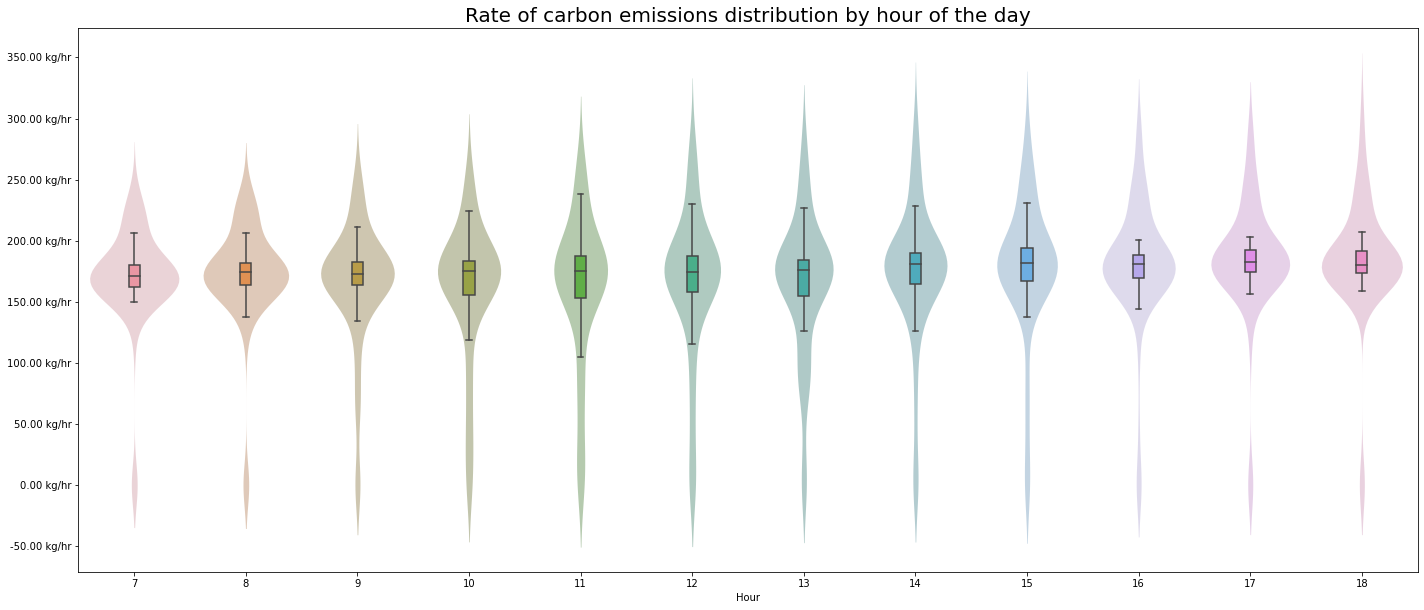

In [182]:
utils_plot.create_violin_plot(df_pivot, range(7, 19), ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(24, 10), annotation=False)

Time window: March ~ July

In [183]:
df_hourly_emissions = df_hourly[(df_hourly['datetime'].dt.month >= 3) & (df_hourly['datetime'].dt.month <= 6)]
df_hourly_emissions = df_hourly_emissions[columns + ['datetime']]
# Ensure Datetime is the index
df_hourly_emissions['Hour'] = df_hourly_emissions['datetime'].dt.hour

# Pivot table to rearrange the DataFrame
df_pivot = df_hourly_emissions.pivot_table(index=df_hourly_emissions['datetime'].dt.date, columns='Hour', values='HVAC', aggfunc='sum')
df_pivot.reset_index(inplace=True)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


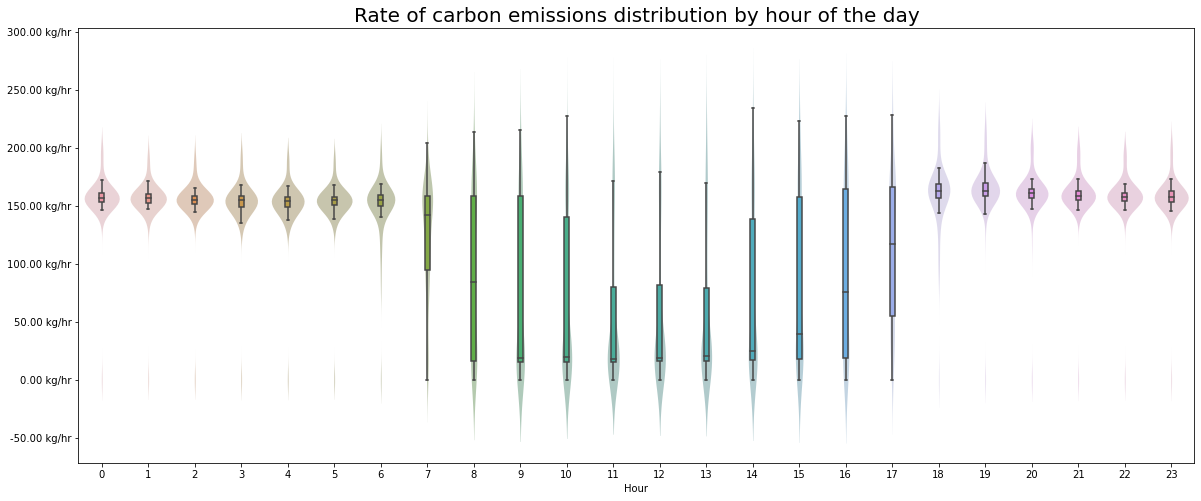

In [184]:
utils_plot.create_violin_plot(df_pivot, range(0, 24), ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(20, 8), annotation=False)

In [185]:
# Prepare dataframe
power = df_HVAC[['datetime'] + columns]
power.columns = ['datetime', 'power']
emissions = df_emissions[['datetime'] + columns]
emissions.columns = ['datetime', 'emissions']

# merge
df_ls = pd.merge(emissions, power, on = 'datetime', how = 'outer')
df_ls = pd.merge(df_ls, df_moer[['datetime', 'moer']], on = 'datetime', how = 'outer')

# interpolation for missing data
df_ls = df_ls.set_index('datetime')
df_ls = df_ls.groupby(pd.Grouper(freq='D')).apply(utils_get.process_group).dropna(how='all', axis=0)
df_ls.reset_index(inplace=True)

# filter out occupied hours
df_ls = df_ls[(df_ls['datetime'].dt.month >= 3) & (df_ls['datetime'].dt.month <= 7)]
df_ls['hod'] = df_ls['datetime'].dt.hour
df_ls.reset_index(drop=True, inplace=True)

In [186]:
potential = []
i = 0
saving = 0
while i < len(df_ls):
    if df_ls['hod'][i] in[11, 12, 13]:
        potential.append(df_ls["power"][i] * 1.5)
        saving = saving - df_ls["power"][i] * 0.5
    elif df_ls['hod'][i] in[14, 15, 16, 17]:
        potential.append(df_ls["power"][i] + saving / 16)
    else:
        if df_ls['hod'][i] == 18:
            saving = 0
        potential.append(df_ls["power"][i])
    i = i + 1

df_ls['potential_power'] = potential
df_ls['potential_emissions'] = df_ls['potential_power'] * df_ls['moer'] / 1000

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


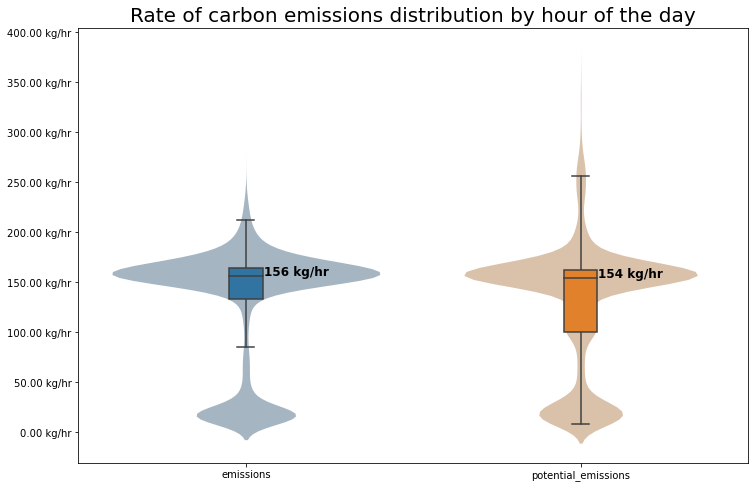

In [187]:
utils_plot.create_violin_plot(df_ls, ['emissions', 'potential_emissions'], ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


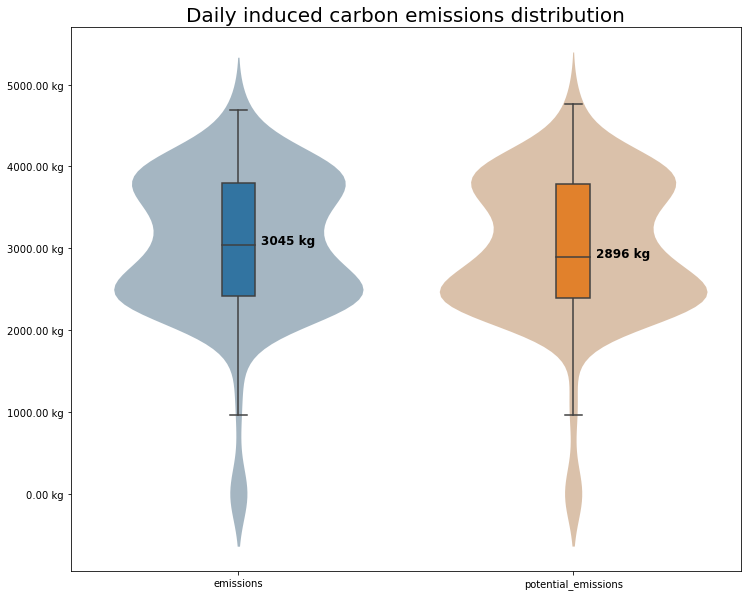

In [188]:
# Group by each day and calculate the sum of a specific column, say 'your_column_name'
daily_sum = df_ls.set_index('datetime')
daily_sum = daily_sum.resample('D')[['emissions', 'power', 'potential_power', 'potential_emissions']].sum() * 0.25

# Convert the Series back to DataFrame if needed
daily_sum.reset_index(inplace=True)
daily_sum.head()

utils_plot.create_violin_plot(daily_sum, ['emissions', 'potential_emissions'], ' kg', 'Daily induced carbon emissions distribution', figsize=(12, 10))

Chiller load shift approximation analysis

## Task 2: Examing HVAC carbon emissions for Nano fab

In [189]:
hvac = df_power['SDH.SW.MSA.MS41A.PWR REAL 3 P'] + df_power['SDH.SW.MSA.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,331.999
1,2023-01-20 16:00:00-08:00,330.999
2,2023-01-20 16:15:00-08:00,334.499
3,2023-01-20 16:30:00-08:00,319.999
4,2023-01-20 16:45:00-08:00,325.999


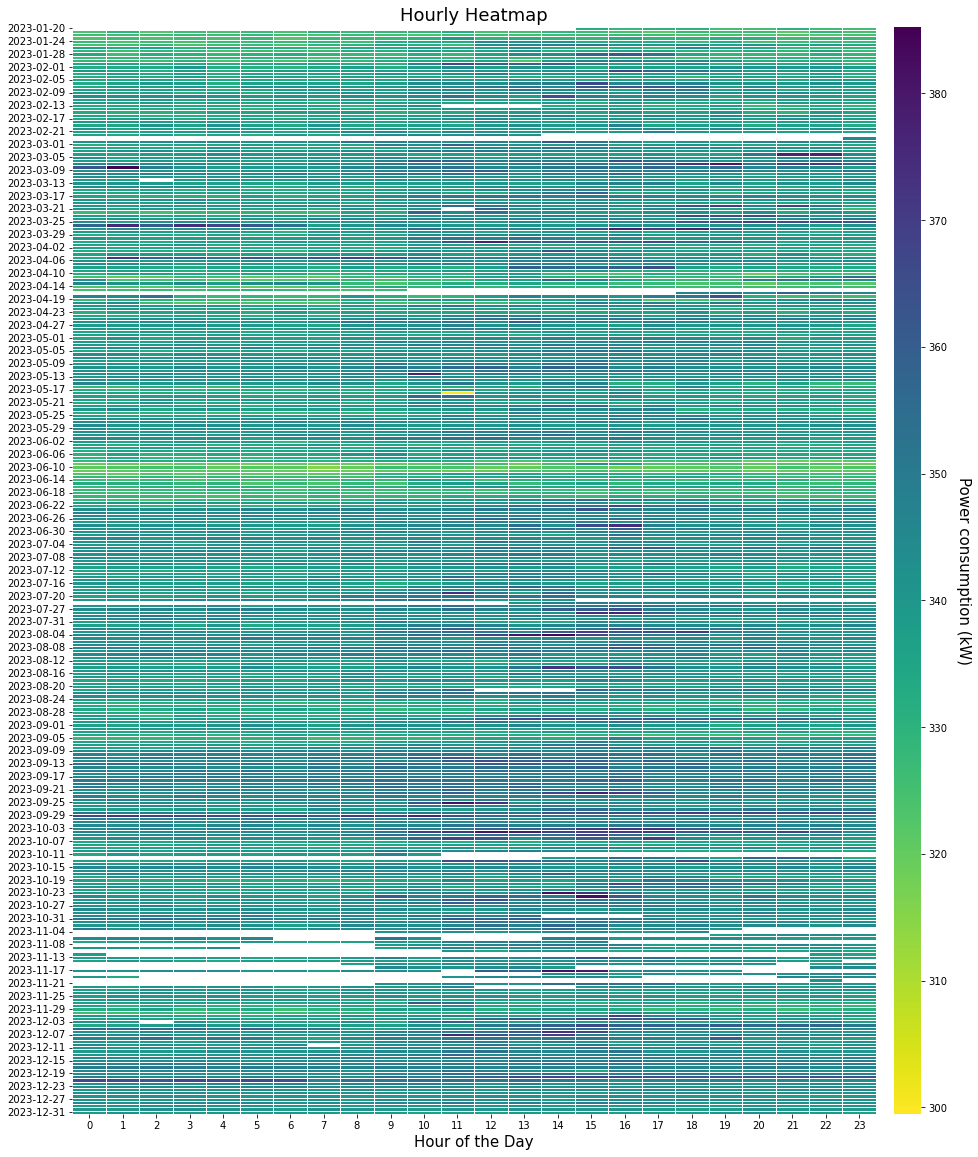

In [190]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [191]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,157.359558
1,2023-01-20 16:00:00-08:00,151.425643
2,2023-01-20 16:15:00-08:00,151.913167
3,2023-01-20 16:30:00-08:00,144.988987
4,2023-01-20 16:45:00-08:00,147.756873


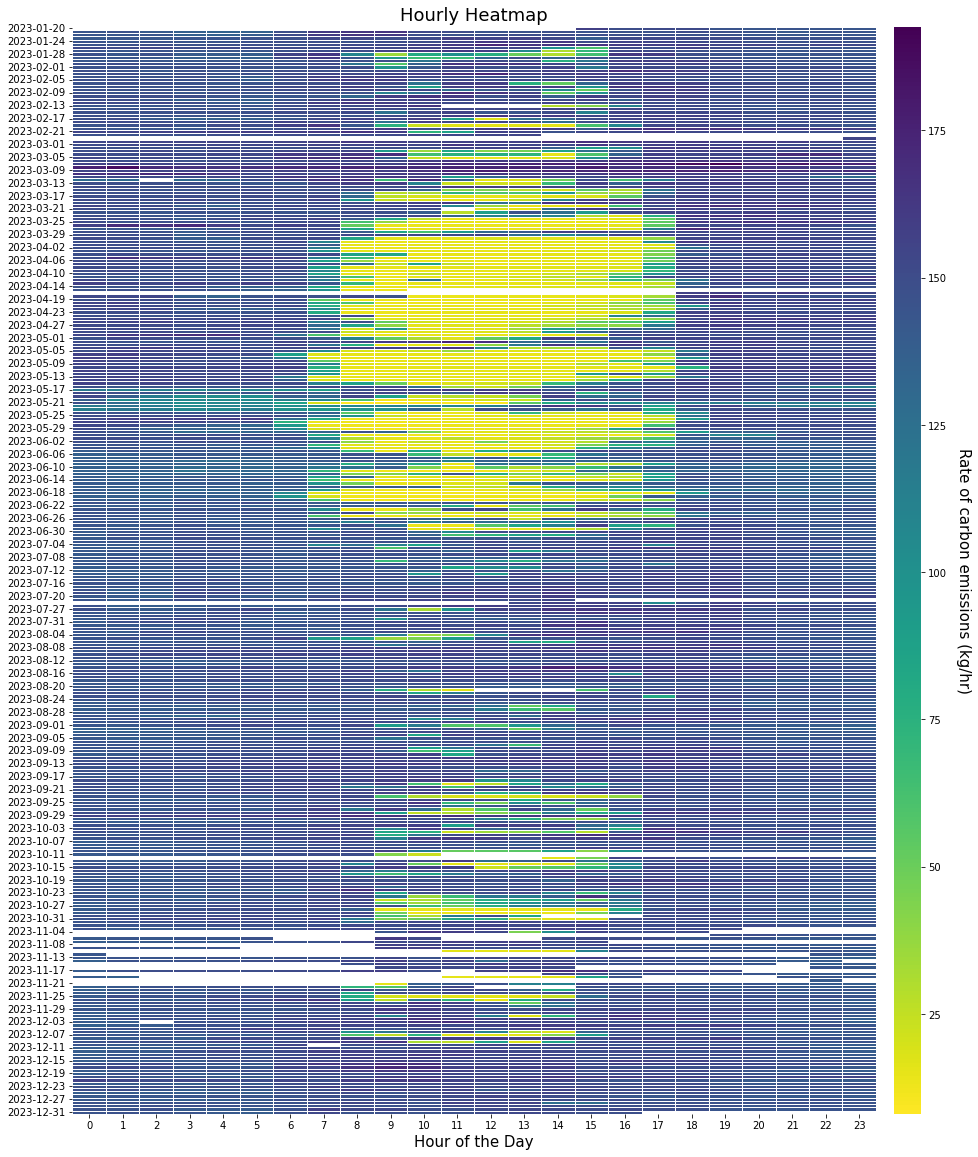

In [192]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [193]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]


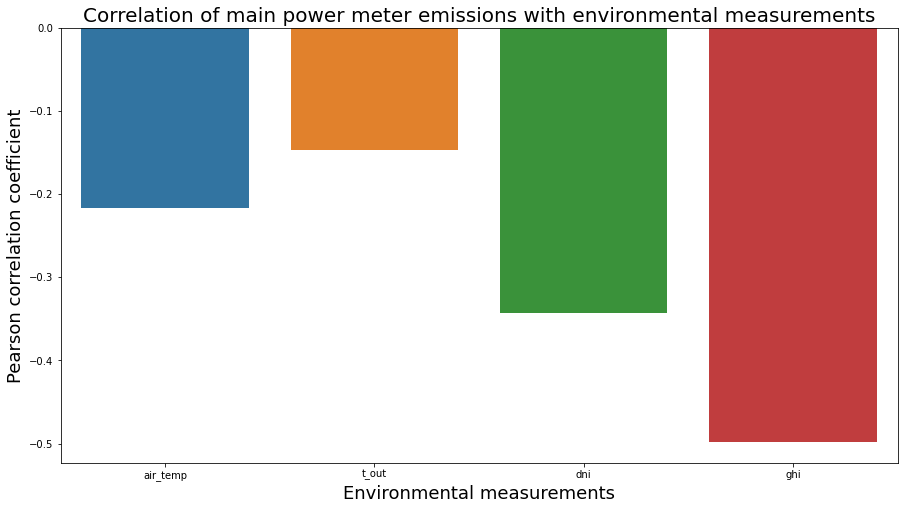

In [194]:
df_MJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

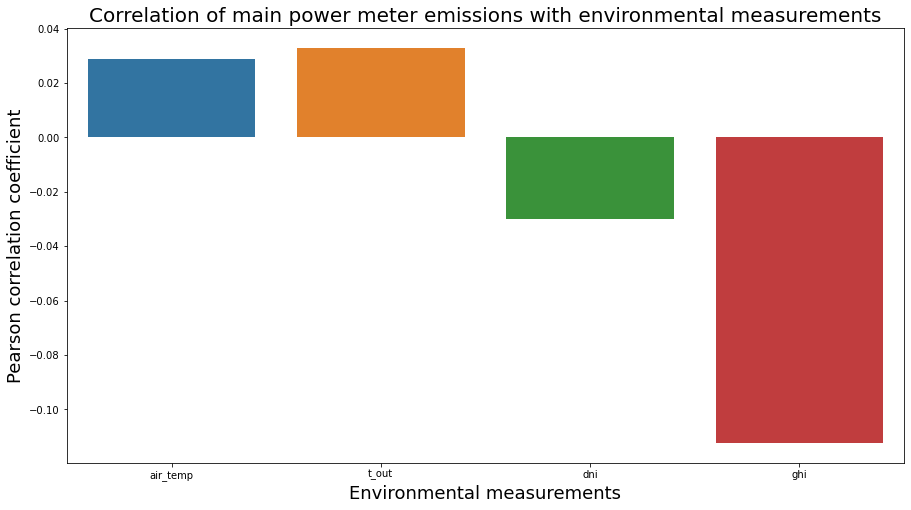

In [195]:
df_JS = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

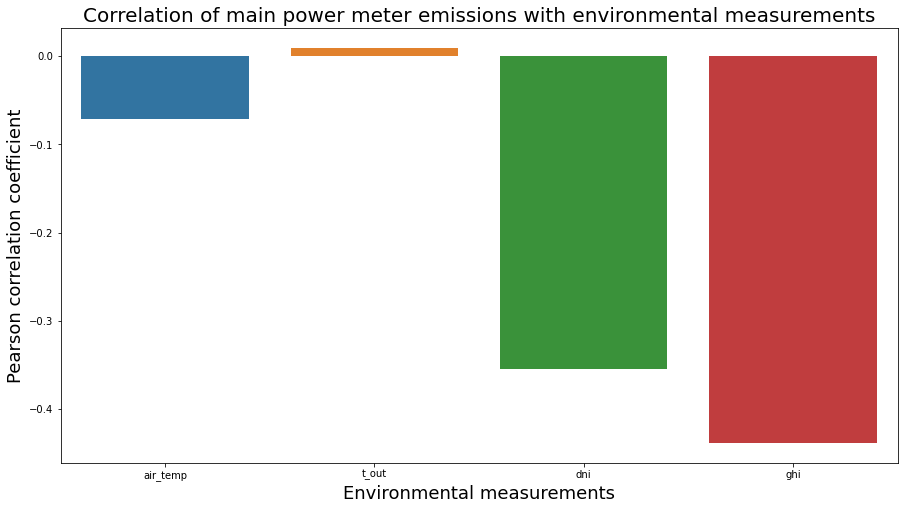

In [196]:
df_OF = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

## Task 3: Examing HVAC carbon emissions for office space

In [197]:
hvac = df_power['SDH.SW.MSA.CD4RA.PWR REAL 3 P'] + df_power['SDH.SW.MSB.MS41B.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,204.998
1,2023-01-20 16:00:00-08:00,204.998
2,2023-01-20 16:15:00-08:00,200.498
3,2023-01-20 16:30:00-08:00,210.998
4,2023-01-20 16:45:00-08:00,184.998


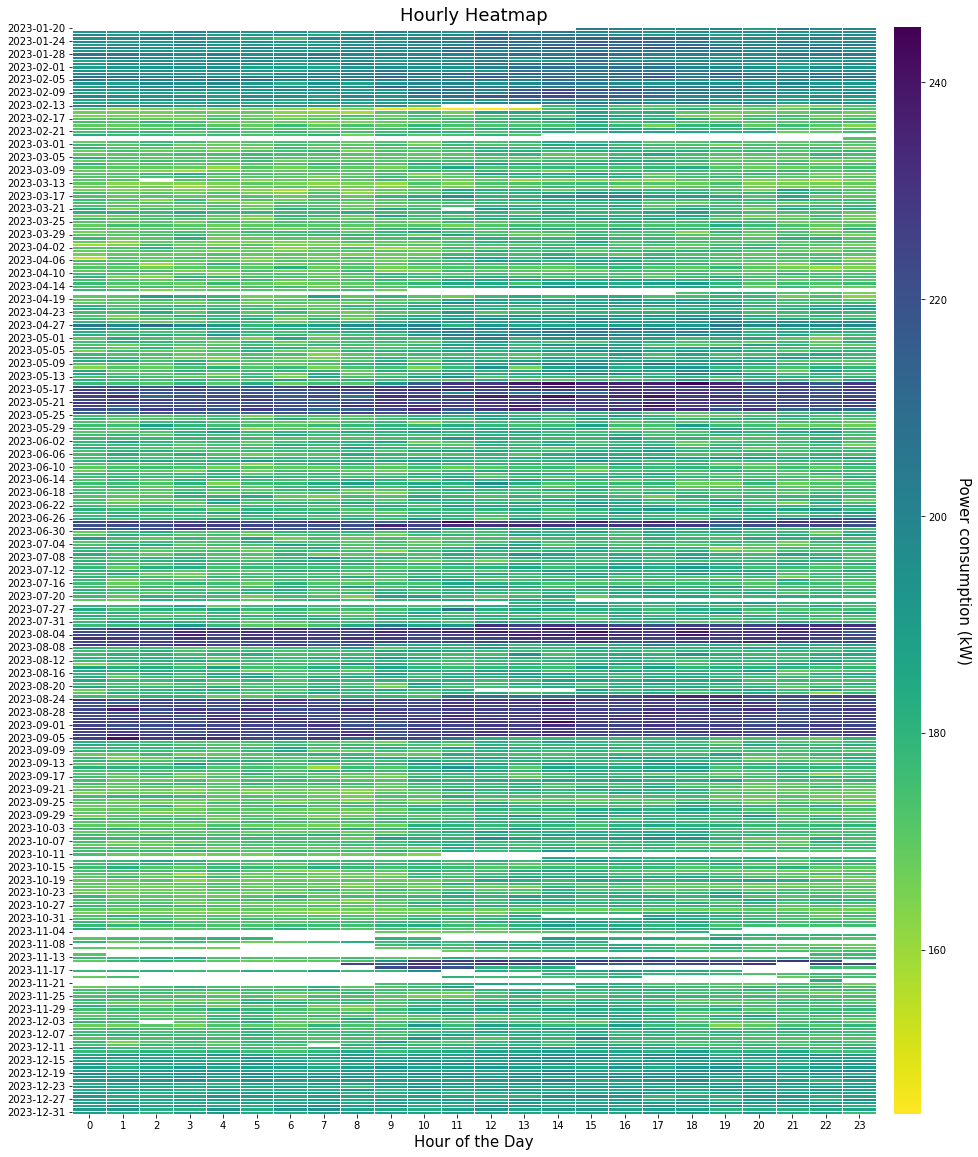

In [198]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [199]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,97.164132
1,2023-01-20 16:00:00-08:00,93.782622
2,2023-01-20 16:15:00-08:00,91.056434
3,2023-01-20 16:30:00-08:00,95.601506
4,2023-01-20 16:45:00-08:00,83.849110


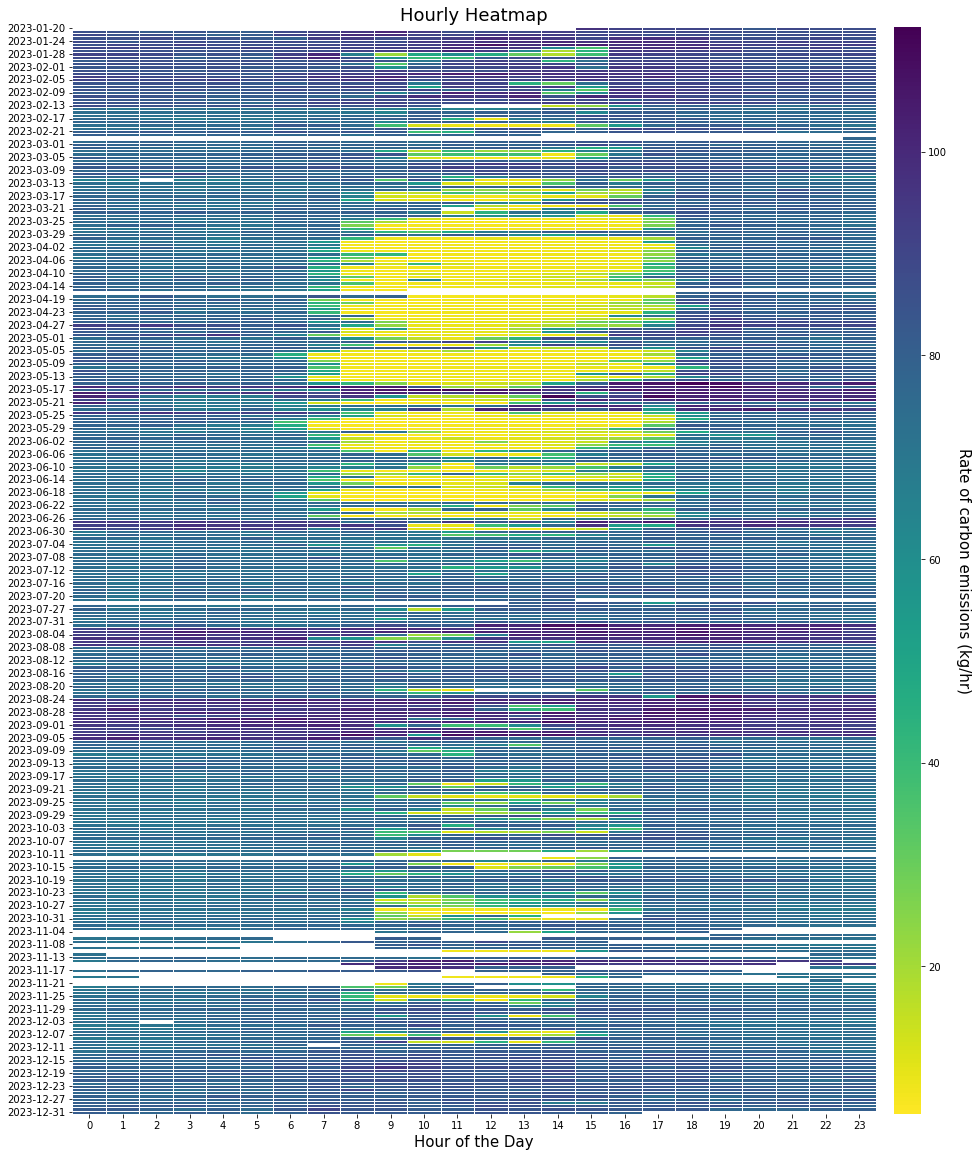

In [200]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Rate of carbon emissions (kg/hr)', figsize=(18, 20))

Get overall dataframe

In [201]:
df_all = pd.merge(df_emissions[['datetime', 'HVAC']], df_climate, on = 'datetime', how = 'outer')
df_hourly = df_all.set_index('datetime')
df_hourly = df_hourly.resample('1H').mean()
df_hourly.reset_index(inplace=True)
df_hourly_occ = df_hourly[(df_hourly['datetime'].dt.hour >= 7) & (df_hourly['datetime'].dt.hour <= 18)]

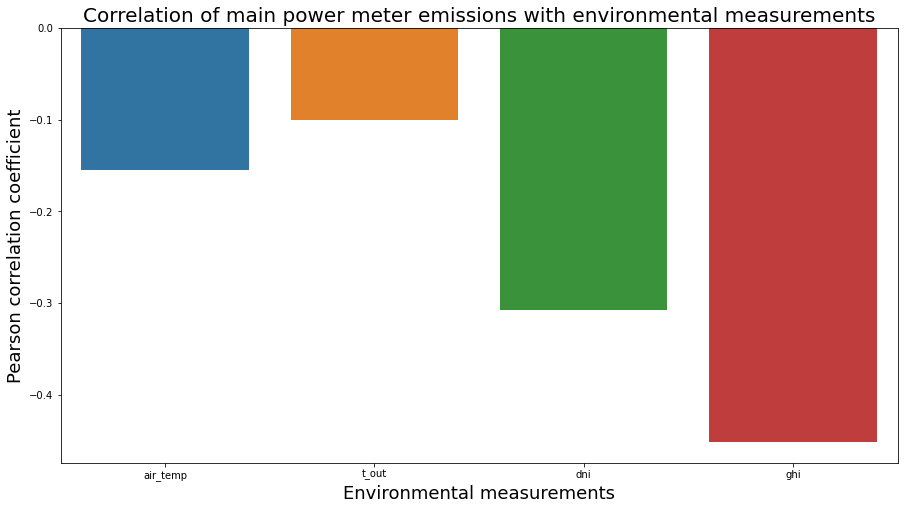

In [202]:
df_MJ = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 3) & (df_hourly_occ['datetime'].dt.month <= 6)]
df_MJ = df_MJ[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_MJ.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

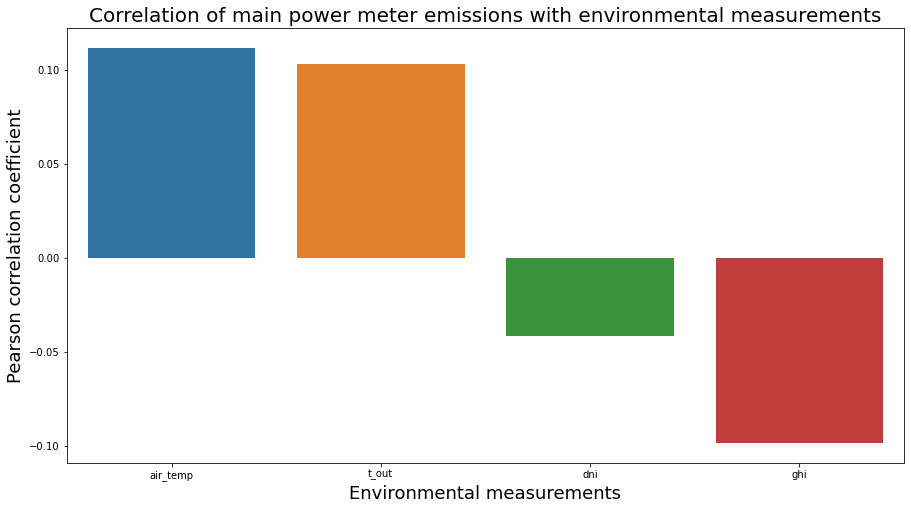

In [203]:
df_JS = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 7) & (df_hourly_occ['datetime'].dt.month <= 9)]
df_JS = df_JS[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_JS.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

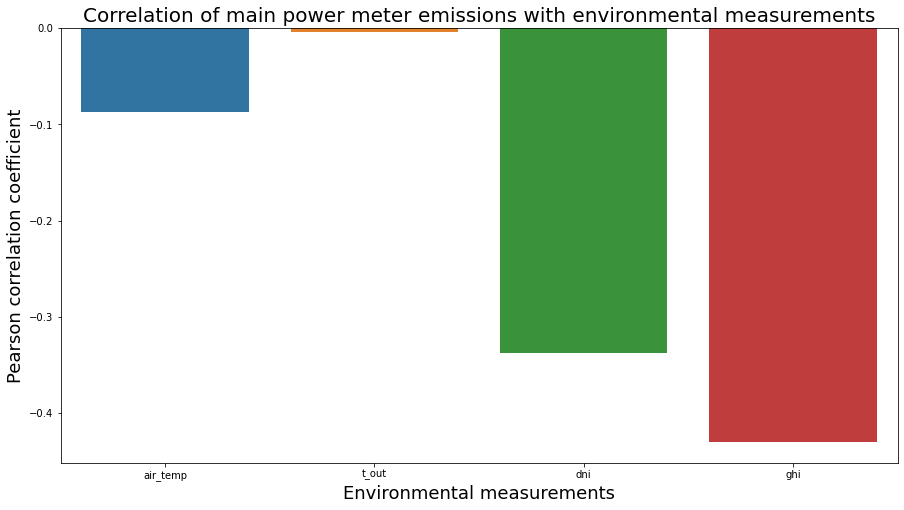

In [204]:
df_OF = df_hourly_occ[(df_hourly_occ['datetime'].dt.month >= 10) | (df_hourly_occ['datetime'].dt.month <= 3)]
df_OF = df_OF[columns + ['air_temp', 't_out', 'dni', 'ghi']]
correlation_matrix = df_OF.corr()
correlation_with_emissions = correlation_matrix['HVAC'].drop('HVAC')  # Drop self-correlation
plt.figure(figsize=[15, 8])
sns.barplot(x=correlation_with_emissions.index, y=correlation_with_emissions.values)
plt.title('Correlation of main power meter emissions with environmental measurements', fontsize = 20)
plt.xlabel('Environmental measurements', fontsize = 18)
plt.ylabel('Pearson correlation coefficient', fontsize = 18)
plt.show()

## Task 3: Examing HVAC carbon emissions for lighting and plug-load

In [205]:
hvac = df_power['SDH.SW.MSB.CB4A.PWR REAL 3 P']
df_HVAC = pd.DataFrame({'datetime': df_power['datetime'], 'HVAC': hvac})
columns = ['HVAC']
df_HVAC.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,55.999
1,2023-01-20 16:00:00-08:00,55.999
2,2023-01-20 16:15:00-08:00,57.999
3,2023-01-20 16:30:00-08:00,55.999
4,2023-01-20 16:45:00-08:00,54.999


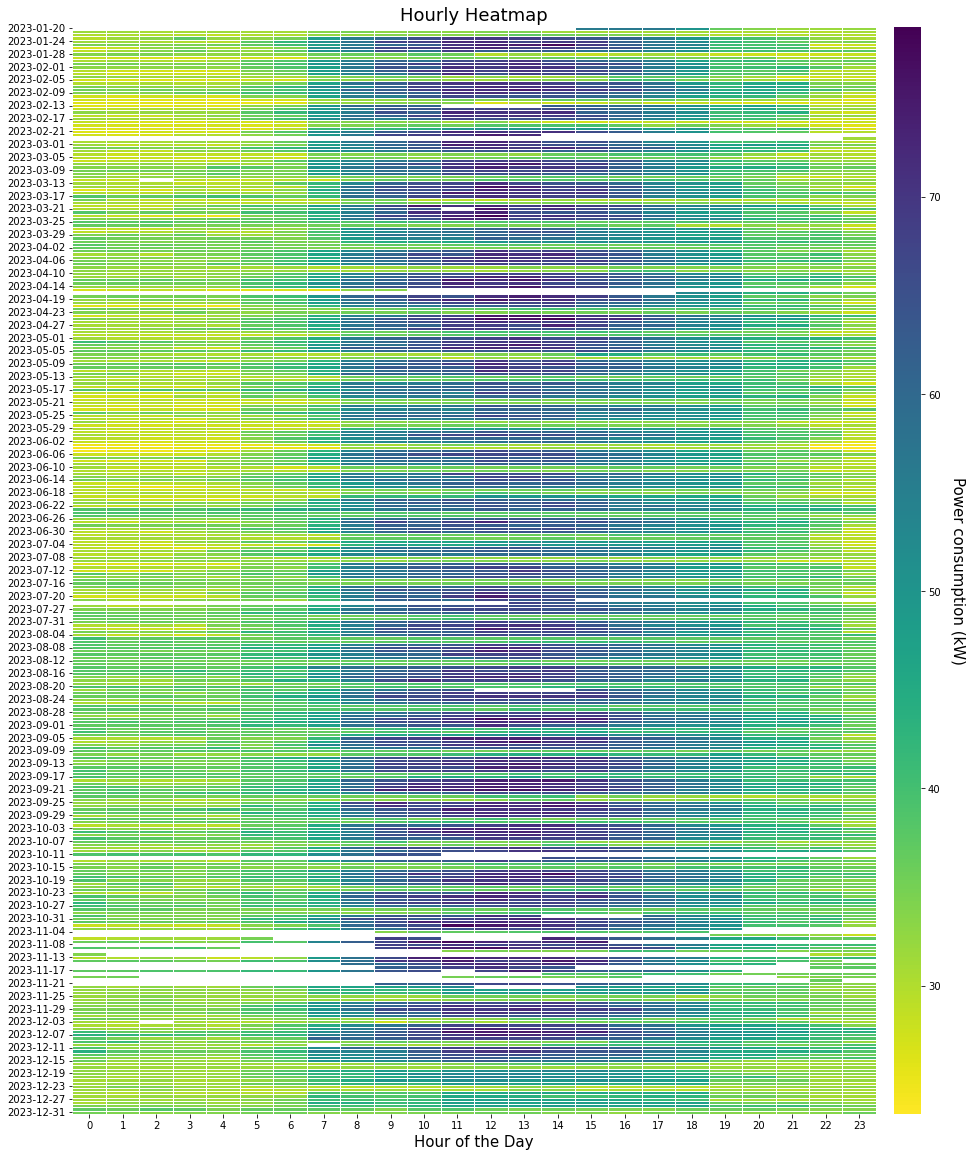

In [206]:
utils_plot.plot_hourly_heatmap(df_HVAC, columns, 'Power consumption (kW)', figsize=(18, 20))

In [207]:
df_temp = pd.merge(df_HVAC, df_moer, on = 'datetime', how = 'outer')
df_emissions = df_temp.copy()

# Multiply all columns except the first and last by the last column
df_emissions.iloc[:, 1:-1] = df_emissions.iloc[:, 1:-1].multiply(df_emissions.iloc[:, -1], axis="index") / 1000
df_emissions = df_emissions.drop(columns=['value', 'moer'])
# Now 'new_df' is the new DataFrame with the desired calculations

df_emissions.head()

,datetime,HVAC
0,2023-01-20 15:45:00-08:00,26.542182
1,2023-01-20 16:00:00-08:00,25.618460
2,2023-01-20 16:15:00-08:00,26.340323
3,2023-01-20 16:30:00-08:00,25.372699
4,2023-01-20 16:45:00-08:00,24.927930


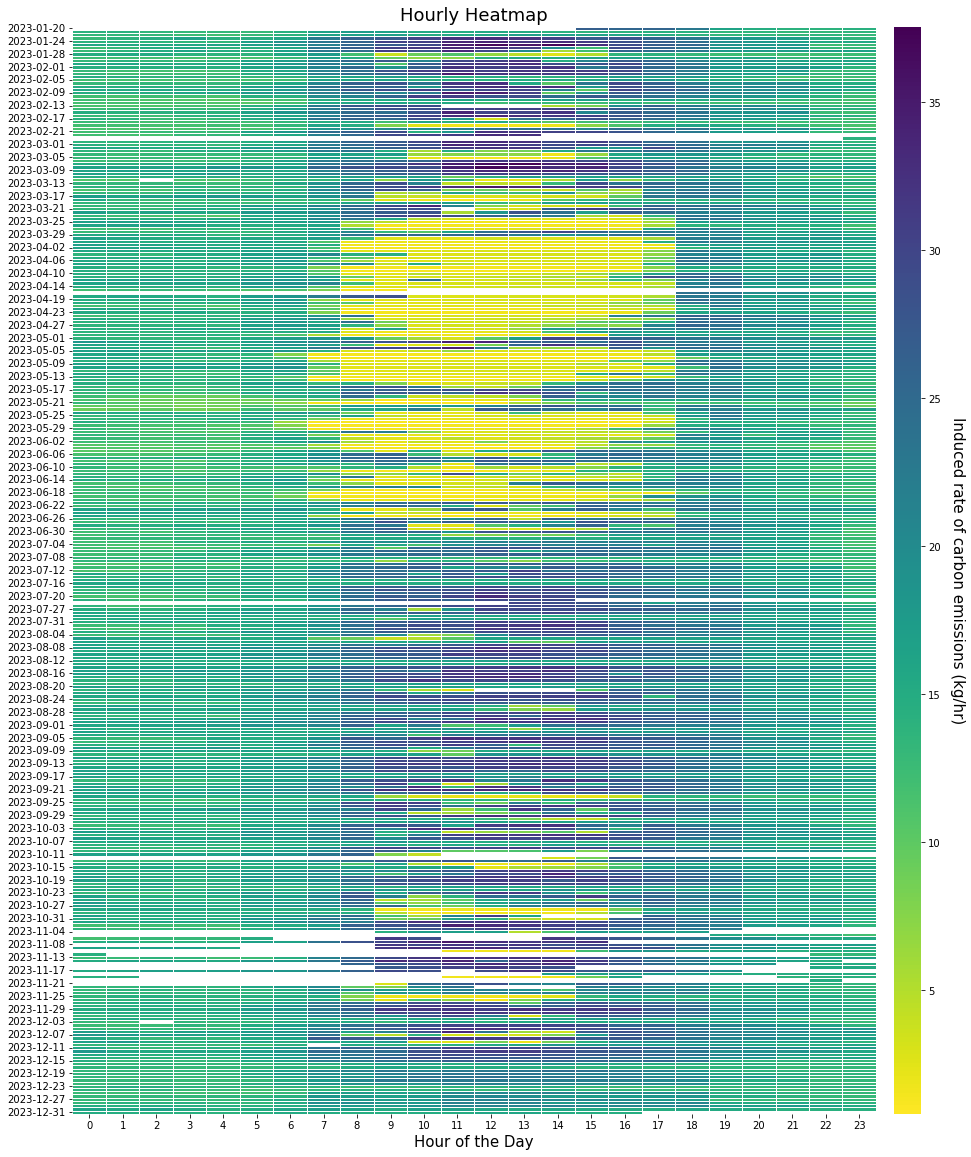

In [307]:
utils_plot.plot_hourly_heatmap(df_emissions, columns, 'Induced rate of carbon emissions (kg/hr)', figsize=(18, 20))

## Task 4: Calculate load shift potential for chiller (Assume chiller setpoint reset)

In [209]:
import pandas as pd

# Define the conversion function
def f2c(df, column_name):

    # Convert the column from °F to °C
    df[column_name] = (df[column_name] - 32) * 5/9
    return df

Regression analysis on Chiller COP

In [210]:
# Read dataframe from Brick query
sat = pd.read_csv("./ls_ctr/sat.csv")
sat['sat_avg'] = np.mean(sat[['AH2A_SAT', 'AH2B_SAT']], axis=1)
sat = sat[['datetime', 'sat_avg']]
sat['datetime'] = pd.to_datetime(sat['datetime'])

zoneT = pd.read_csv("./ls_ctr/zoneT.csv")
zoneT[zoneT.iloc[:, 1:] > 80] = np.nan
zoneT['zoneT_avg'] = zoneT.drop(columns=['datetime'], axis=1).mean(axis=1)
zoneT = zoneT[['datetime', 'zoneT_avg']]
zoneT['datetime'] = pd.to_datetime(zoneT['datetime'])

afr = pd.read_csv("./ls_ctr/afr.csv")
afr['afr_avg'] = np.sum(afr[['AH2A_SF_CFM', 'AH2B_SF_CFM']], axis=1)
afr = afr[['datetime', 'afr_avg']]
afr['datetime'] = pd.to_datetime(afr['datetime'])

ch2 = df_power[['datetime', 'SDH.SW.MSA.CH-2.PWR REAL 3 P']]

moer = df_moer[['datetime', 'moer']]

temp = df_climate[['datetime', 'air_temp']]

# Merge
df = pd.merge(pd.merge(sat, afr, on='datetime', how='inner'), zoneT, on='datetime', how='inner')
df['datetime'] = df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
df = pd.merge(df, pd.merge(temp, ch2, on='datetime', how='inner'), on='datetime', how='inner')
df_all = pd.merge(df, moer, on='datetime', how='inner')

# Transfer to °C
df_all = f2c(df_all, ['sat_avg', 'zoneT_avg'])
df_all.dropna(inplace=True)

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


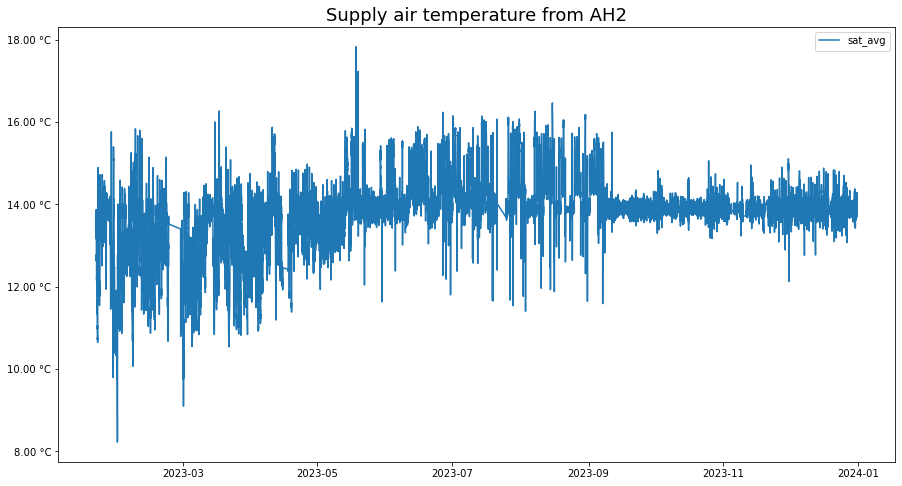

In [211]:
utils_plot.make_plot(df_all, ['sat_avg'], unit=" °C", plot_title="Supply air temperature from AH2", figsize=(15, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


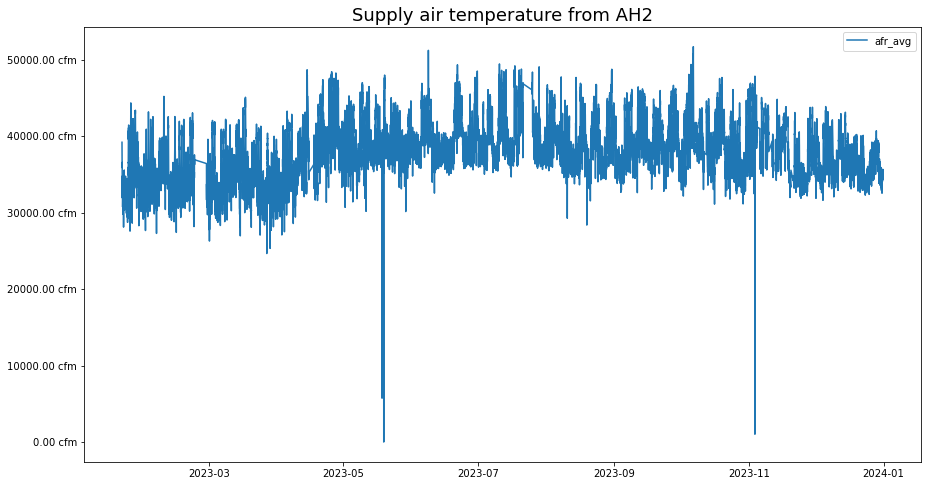

In [212]:
utils_plot.make_plot(df_all, ['afr_avg'], unit=" cfm", plot_title="Supply air temperature from AH2", figsize=(15, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


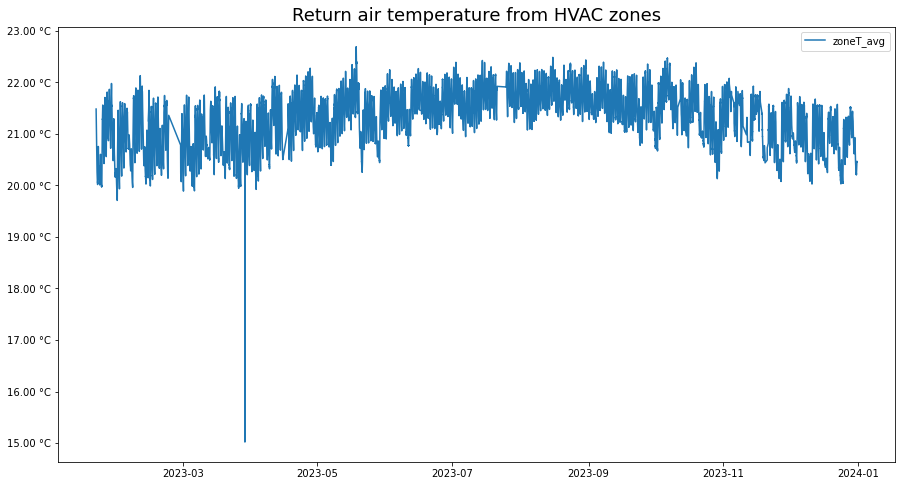

In [213]:
utils_plot.make_plot(df_all, ['zoneT_avg'], unit=" °C", plot_title="Return air temperature from HVAC zones", figsize=(15, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


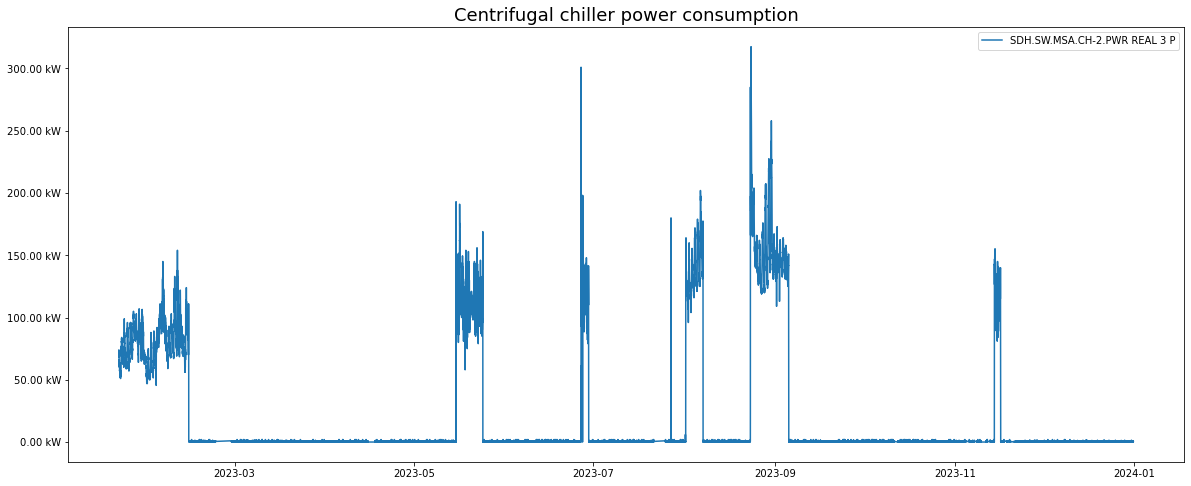

In [214]:
utils_plot.make_plot(df_all, ['SDH.SW.MSA.CH-2.PWR REAL 3 P'], unit=" kW", plot_title="Centrifugal chiller power consumption", figsize=(20, 8))

Calculate chiller efficiency kW/ton

In [364]:
# Define the function to calculate wet-bulb temperature
def calculate_wetbulb(df):
    # Constants for the approximation formula
    c1, c2, c3, c4, c5, c6, c7 = 0.151977, 8.313659, 1.676331, 0.00391838, 0.023101, 4.686035, 0.00000022
    
    # Extracting dry-bulb temperature (Tdb) and relative humidity (RH) from the dataframe
    Tdb = df['t_out']
    RH = df['rh_out']
    
    # Convert RH from percentage to fraction
    RH_frac = RH / 100.0
    
    # Calculate wet-bulb temperature using the approximation formula
    Twb = Tdb * np.arctan(c1 * (RH_frac + c2)**0.5) + \
          np.arctan(Tdb + RH_frac) - np.arctan(RH_frac - c3) + \
          c4 * (RH_frac)**1.5 * np.arctan(c5 * RH_frac) - c6 + \
          c7 * Tdb * RH_frac**2  # This term is typically very small and can be ignored for most practical purposes
    
    df['wb_temp'] = Twb
    return df


/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_20121/3660666915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['thermal'] = 1.006 * 1.2 * 0.000471947 * train_df['afr_avg'] * (train_df['zoneT_avg'] - train_df['sat_avg'])
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_20121/3660666915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['COP'] = train_df['thermal'] / train_df['SDH.SW.MSA.CH-2.PWR REAL 3 P']
/Users/aoyuzou/opt/anaconda3/lib/python3.9/site-packages/

Avg COP: 1.5956244284262278
Avg air temp: 14.342016491754123
Mean Squared Error: 0.13058990386036617
Intercept: 2.6666438266068595
Slope: -0.0746770441099697


/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


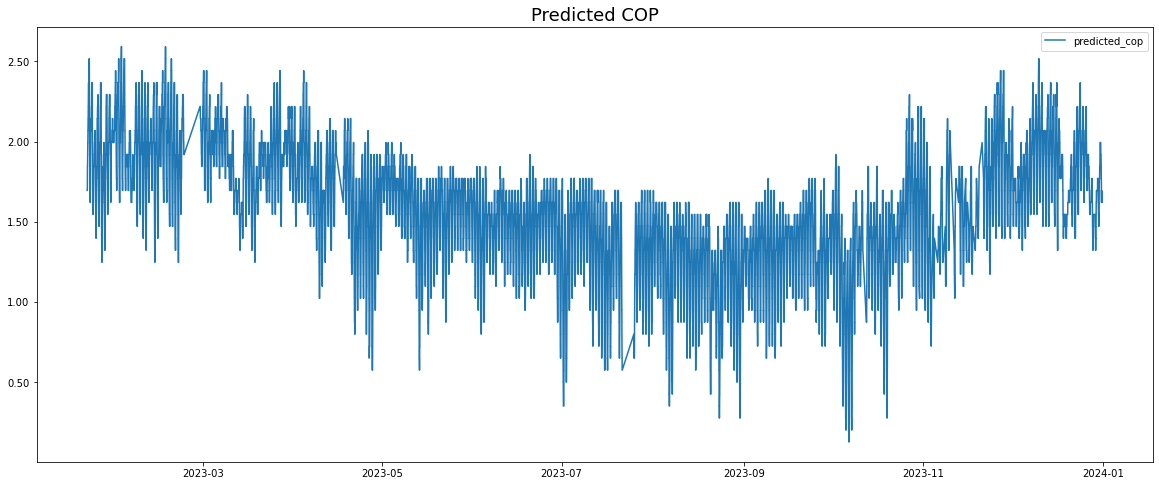

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


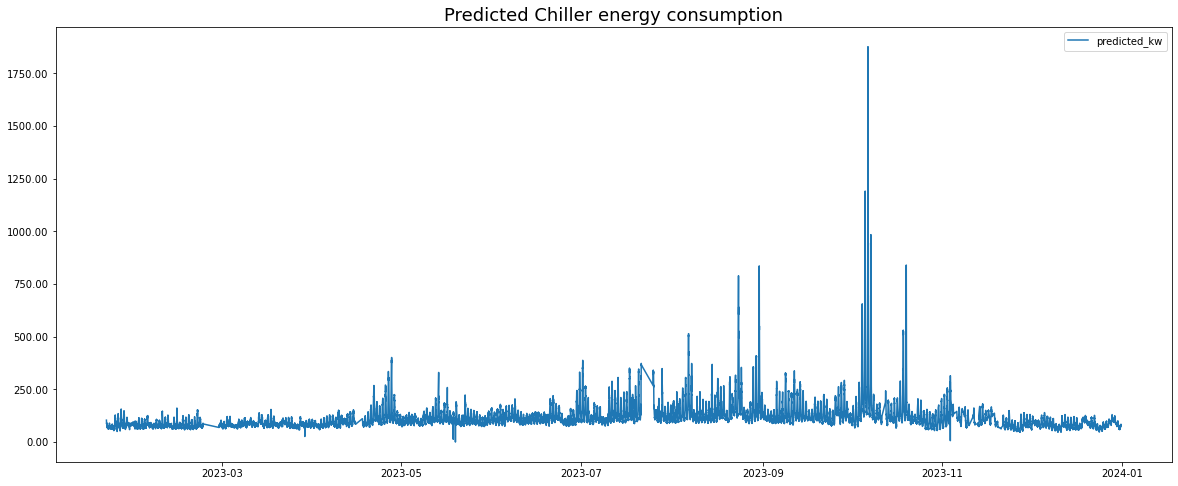

In [388]:
# Training dataset 
train_df = df_all[df_all['SDH.SW.MSA.CH-2.PWR REAL 3 P'] > 6]
train_df['thermal'] = 1.006 * 1.2 * 0.000471947 * train_df['afr_avg'] * (train_df['zoneT_avg'] - train_df['sat_avg'])
train_df['COP'] = train_df['thermal'] / train_df['SDH.SW.MSA.CH-2.PWR REAL 3 P']
train_df.rename(columns={'SDH.SW.MSA.CH-2.PWR REAL 3 P': 'power'}, inplace=True)
train_df['emissions'] = train_df['power'] * train_df['moer'] / 1000
print('Avg COP:', train_df['COP'].mean())
print('Avg air temp:', train_df['air_temp'].mean())

# build linear models for COP based on outside temperature
# Reshape x to be a 2D array
X = train_df['air_temp'].values.reshape(-1, 1)
y = train_df['COP'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

# make prediction on the entire dataset based on measured weather
t_out = df_all['air_temp'].values.reshape(-1, 1)
COP_pred = model.predict(t_out)
df_all["predicted_cop"] = COP_pred

utils_plot.make_plot(df_all, ["predicted_cop"], plot_title="Predicted COP", figsize=(20, 8))

df_all["predicted_kw"] = 1.006 * 1.2 * 0.000471947 * df_all['afr_avg'] * (df_all['zoneT_avg'] - df_all['sat_avg']) / df_all["predicted_cop"]
utils_plot.make_plot(df_all, ["predicted_kw"], plot_title="Predicted Chiller energy consumption", figsize=(20, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df.iloc[:, 0])
/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


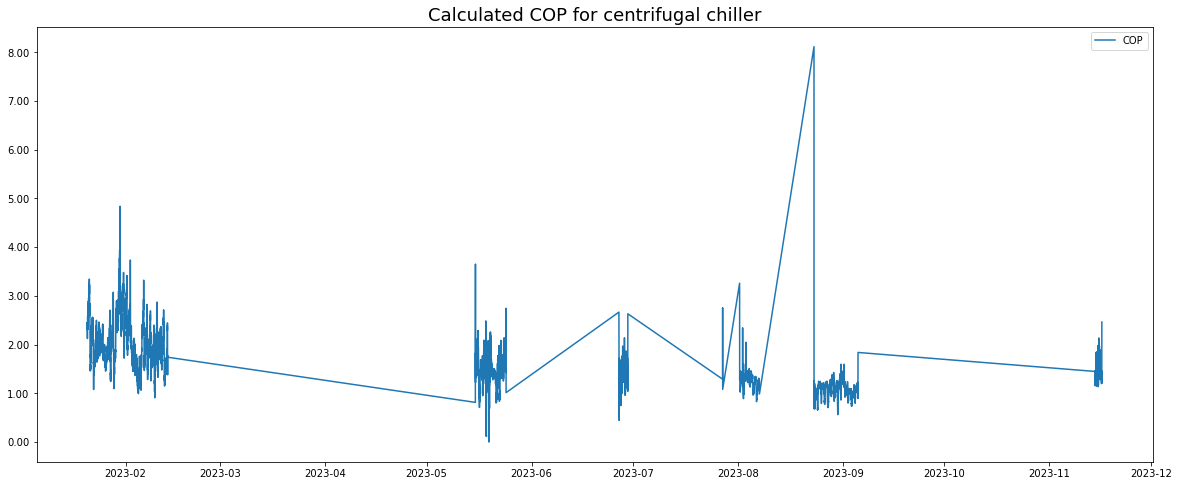

In [281]:
utils_plot.make_plot(train_df, ['COP'], plot_title="Calculated COP for centrifugal chiller", figsize=(20, 8))

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_20121/3326605452.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_train['eff'] =  onicon_train['power'] / onicon_train['thermal']
/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_20121/3326605452.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_train['emissions'] = onicon_train['power'] * onicon_train['moer'] / 1000


Avg eff (kW/ton): 0.5840341262816083
Root mean Squared Error: 0.11382184073937071
Intercept: 0.7872733029253314
Slope: [-0.01982475 -0.00187467 -0.00147391]


/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


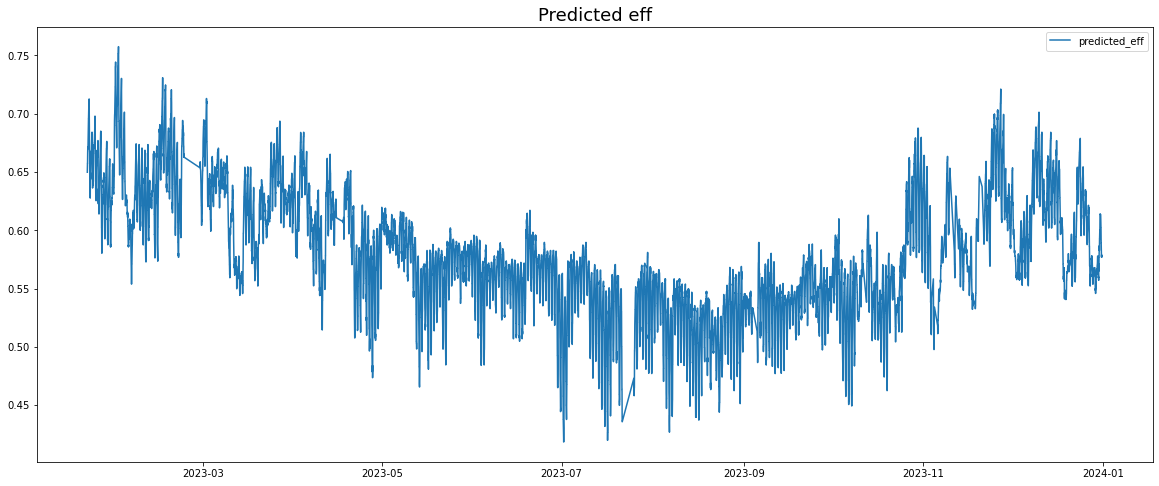

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


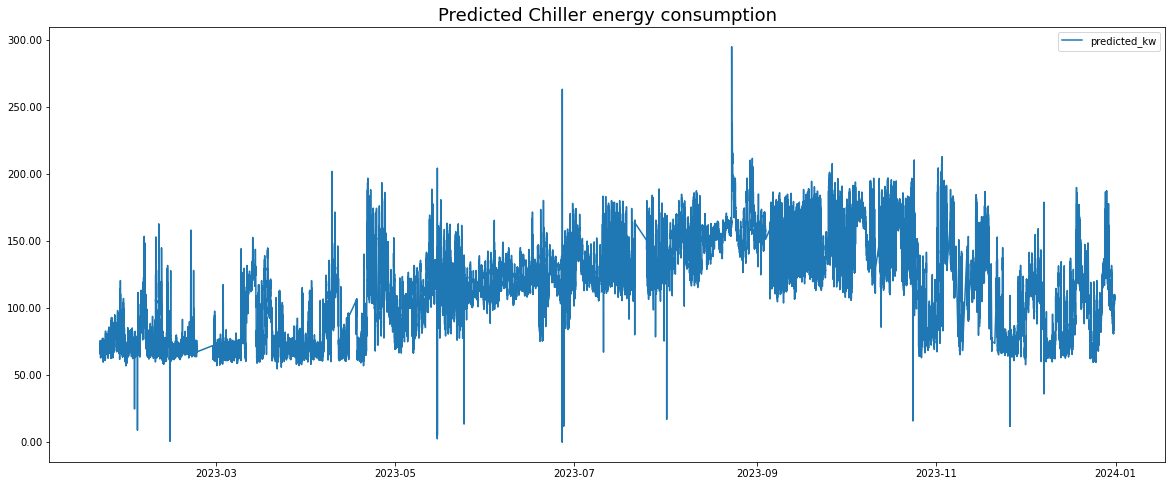

RMSE for power consumption: 13.652243373736052


/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_20121/3326605452.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onicon_test['diff'] = onicon_test['power'] - onicon_test['predicted_kw']


In [398]:
# Read dataframe
df_climate = calculate_wetbulb(df_climate)

ch2 = df_power[['datetime', 'SDH.SW.MSA.CH-2.PWR REAL 3 P']]
moer = df_moer[['datetime', 'moer']]

onicon_df = pd.read_csv("./ls_ctr/onicon.csv")
onicon_df['datetime'] = pd.to_datetime(onicon_df['datetime'])
onicon_df['datetime'] = onicon_df['datetime'].dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)

# Merge
onicon_df = pd.merge(pd.merge(ch2, df_climate, on='datetime', how='inner'), pd.merge(moer, onicon_df, on='datetime', how='inner'), on='datetime', how="inner")

# Clean
onicon_df.rename(columns={'SDH.SW.MSA.CH-2.PWR REAL 3 P': 'power'}, inplace=True)
onicon_df.dropna(inplace=True)

# Train dataframe
onicon_train = onicon_df[onicon_df['power'] > 6]
onicon_train['eff'] =  onicon_train['power'] / onicon_train['thermal']

onicon_train['emissions'] = onicon_train['power'] * onicon_train['moer'] / 1000
print('Avg eff (kW/ton):', onicon_train['eff'].mean())

# build linear models for eff based on outside temperature
# Reshape x to be a 2D array
X = onicon_train[['wb_temp', 'air_temp', 'rh_out']]
y = onicon_train['eff'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Mean Squared Error
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'Root mean Squared Error: {rmse}')

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

# make prediction on the entire dataset based on measured weather
eff_pred = model.predict(onicon_df[['wb_temp', 'air_temp', 'rh_out']])
onicon_df["predicted_eff"] = eff_pred

utils_plot.make_plot(onicon_df, ["predicted_eff"], plot_title="Predicted eff", figsize=(20, 8))

onicon_df["predicted_kw"] = onicon_df['thermal'] * onicon_df["predicted_eff"]
onicon_df["emissions"] = onicon_df['predicted_kw'] * onicon_df["moer"] / 1000
utils_plot.make_plot(onicon_df, ["predicted_kw"], plot_title="Predicted Chiller energy consumption", figsize=(20, 8))

onicon_test = onicon_df[onicon_df['power'] > 6]
onicon_test['diff'] = onicon_test['power'] - onicon_test['predicted_kw']
kw_rmse = np.sqrt(np.mean((onicon_test['power'] - onicon_test['predicted_kw']) ** 2))
print('RMSE for power consumption:', kw_rmse)

Load shift analysis based on moer signal

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


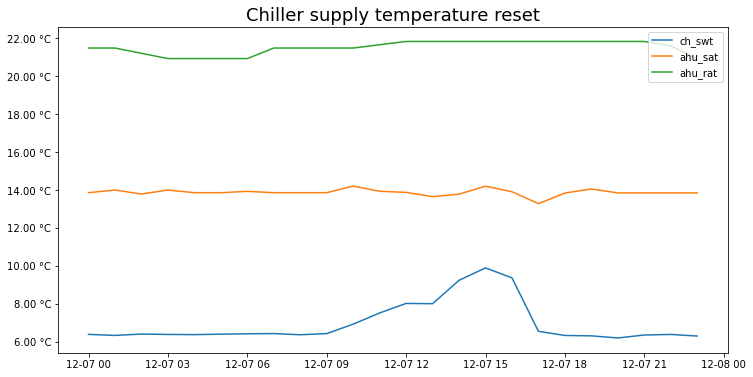

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


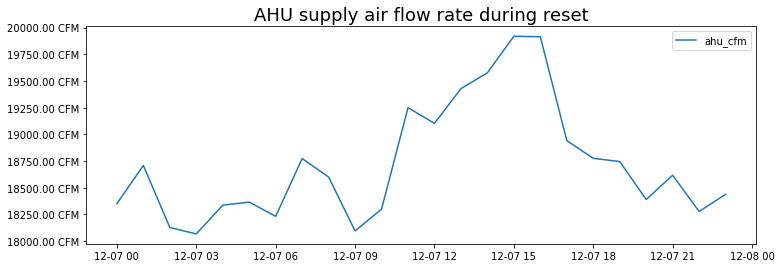

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


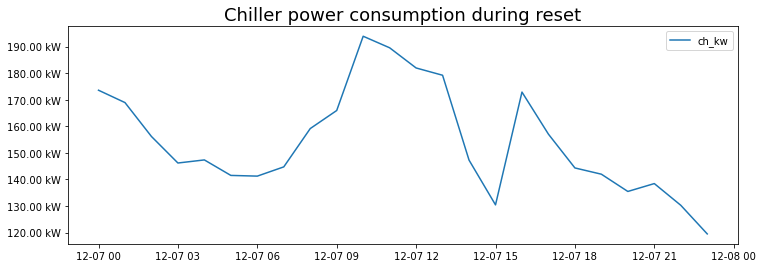

In [282]:
# load setpoint reset data
reset_df = pd.read_csv("./ls_ctr/spt_reset.csv")
reset_df['datetime'] = pd.to_datetime(reset_df['datetime']).dt.tz_localize('America/Los_Angeles', nonexistent='shift_forward', ambiguous=True)
reset_df.set_index('datetime', inplace=True)
reset_df = reset_df.resample('1H').mean()
reset_df.reset_index(inplace=True)
reset_df = f2c(reset_df, ['ch_swt', 'ahu_sat', 'ahu_rat'])
utils_plot.make_plot(reset_df, ['ch_swt', 'ahu_sat', 'ahu_rat'], unit=" °C", plot_title="Chiller supply temperature reset", figsize=(12, 6))
utils_plot.make_plot(reset_df, ['ahu_cfm'], unit=" CFM", plot_title="AHU supply air flow rate during reset", figsize=(12, 4))
utils_plot.make_plot(reset_df, ['ch_kw'], unit=" kW", plot_title="Chiller power consumption during reset", figsize=(12, 4))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


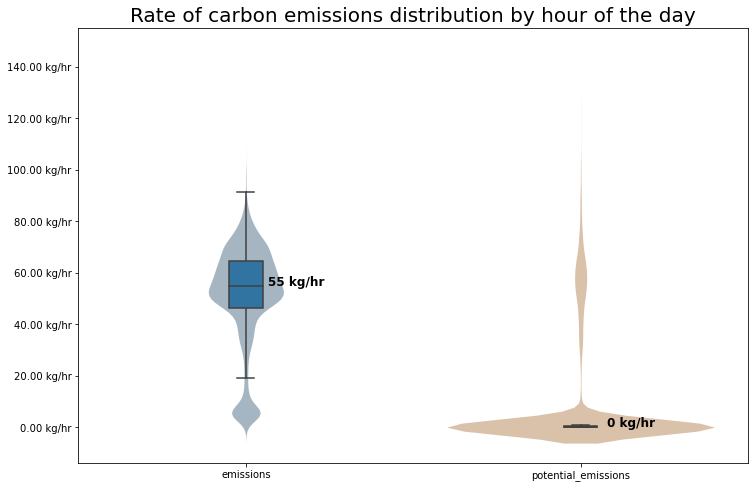

In [387]:
# Chiller 30% setpoint reset
threshold = 50
potential = []
i = 0
deposit = 0
deposit_list = []
activation = 0
onicon_df = onicon_df[(onicon_df['datetime'].dt.month >= 5) & (onicon_df['datetime'].dt.month <= 10)]
onicon_df = onicon_df.reset_index(drop=True)
while i < len(onicon_df):
    if onicon_df['moer'][i] <= threshold:
        potential.append(onicon_df["power"][i] * 1.5)
        deposit = deposit - onicon_df["power"][i] * 0.5
        activation = activation + 1
        deposit_list.append(deposit)
    elif onicon_df['moer'][i] > threshold and deposit < 0:
        if deposit <= -onicon_df["power"][i] * 0.3:
            potential.append(onicon_df["power"][i] * 0.7)
            deposit = deposit + onicon_df["power"][i] * 0.3
            deposit_list.append(deposit)
        else:
            potential.append(onicon_df["power"][i] + deposit)
            deposit = 0
            deposit_list.append(deposit)
    else:
        potential.append(onicon_df["power"][i])
        deposit_list.append(deposit)
    i = i + 1

onicon_df['potential_power'] = potential
onicon_df['potential_emissions'] = onicon_df['potential_power'] * onicon_df['moer'] / 1000
onicon_df['deposit'] = deposit_list
utils_plot.create_violin_plot(onicon_df, ['emissions', 'potential_emissions'], ' kg/hr', 'Rate of carbon emissions distribution by hour of the day', figsize=(12, 8))

/Users/aoyuzou/Documents/Mac/ClassMaterial/ARCH299/SDH/functions/utils_plot.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.2f}{unit}' for y in y_ticks])


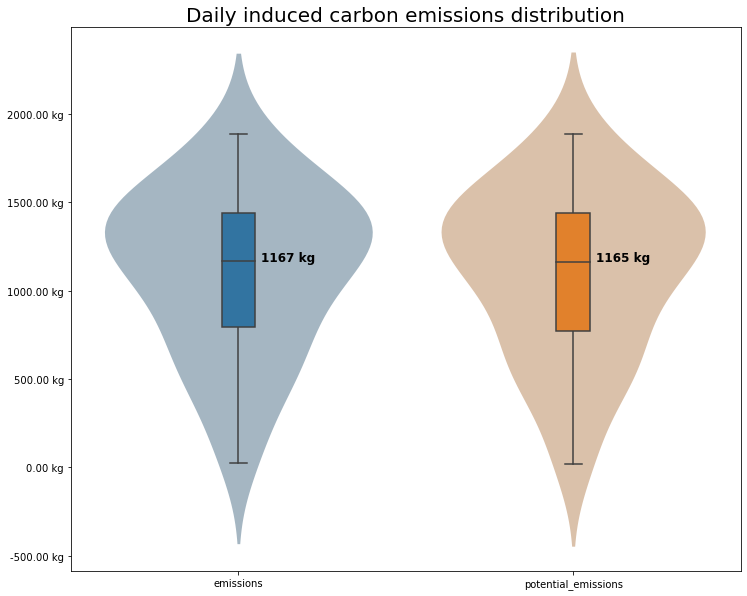

In [350]:
# Group by each day and calculate the sum of a specific column, say 'your_column_name'
daily_sum = train_df.set_index('datetime')
daily_sum = daily_sum.resample('D')[['emissions', 'power', 'potential_power', 'potential_emissions']].sum() * 0.25

# Convert the Series back to DataFrame if needed
daily_sum.reset_index(inplace=True)
daily_sum = daily_sum[daily_sum['power'] > 0]

utils_plot.create_violin_plot(daily_sum, ['emissions', 'potential_emissions'], ' kg', 'Daily induced carbon emissions distribution', figsize=(12, 10))

In [351]:
print(deposit)
print(activation / len(train_df))

0
0.02385008517887564


In [304]:
len(train_df)

2935